Whole Dataset original Shape
(3386, 51)
checking null values in the whole dataset
False
Index(['Site', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Vegetation_1',
       'Vegetation_2', 'Vegetation_3', 'WS', 'RH', 'TA', 'LE_bowen_corr_m',
       'Eeflux_LST', 'Eeflux_LST-1', 'Eeflux_LST-2', 'Eeflux_LST-3',
       'Eeflux_LST-4', 'Eeflux_LST-5', 'Eeflux_NDVI', 'Eeflux_NDVI-1',
       'Eeflux_NDVI-2', 'Eeflux_NDVI-3', 'Eeflux_NDVI-4', 'Eeflux_NDVI-5',
       'Eeflux_Albedo', 'Eeflux_Albedo-1', 'Eeflux_Albedo-2',
       'Eeflux_Albedo-3', 'Eeflux_Albedo-4', 'Eeflux_Albedo-5', 'RH-1', 'RH-2',
       'RH-3', 'RH-4', 'RH-5', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5', 'WS-1',
       'WS-2', 'WS-3', 'WS-4', 'WS-5', 'Date', 'Site_1', 'Site_2', 'Site_3',
       'Site_4', 'Site_5'],
      dtype='object')
Number of sites: 23
checking null values in train
False
checking null values in test
False
checking null values in dataset when applying rarify
False
getting yrel - Control pts is not None, method i

number of noisy one hot encoded: 411 out of 2755
percentage of noisy one hot encoded: 14.918
fixing one hot encoded cols
cols for X_train final training after cross validation
Index(['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Vegetation_1',
       'Vegetation_2', 'Vegetation_3', 'WS', 'RH', 'TA', 'Eeflux_LST',
       'Eeflux_LST-1', 'Eeflux_LST-2', 'Eeflux_LST-3', 'Eeflux_LST-4',
       'Eeflux_LST-5', 'Eeflux_NDVI', 'Eeflux_NDVI-1', 'Eeflux_NDVI-2',
       'Eeflux_NDVI-3', 'Eeflux_NDVI-4', 'Eeflux_NDVI-5', 'Eeflux_Albedo',
       'Eeflux_Albedo-1', 'Eeflux_Albedo-2', 'Eeflux_Albedo-3',
       'Eeflux_Albedo-4', 'Eeflux_Albedo-5', 'RH-1', 'RH-2', 'RH-3', 'RH-4',
       'RH-5', 'TA-1', 'TA-2', 'TA-3', 'TA-4', 'TA-5', 'WS-1', 'WS-2', 'WS-3',
       'WS-4', 'WS-5', 'Site_1', 'Site_2', 'Site_3', 'Site_4', 'Site_5'],
      dtype='object')
(2755, 48)
saved model to /apps/output/trained_models/ as ngboost.pkl
columns used for X_test final
created output dataset
creating plots ...
This is X_

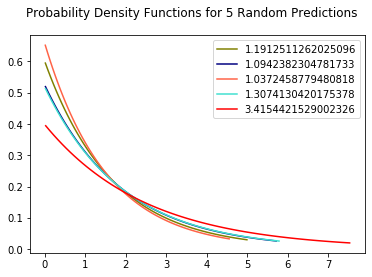

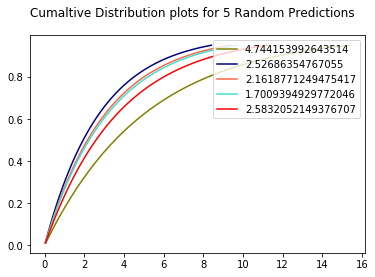

In [6]:
#############################################################################
                            #Imports
#############################################################################
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats.stats import pearsonr, spearmanr
from scipy.spatial import distance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import time
import itertools as it
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
import pickle
from sklearn.compose import ColumnTransformer
from scipy.stats.stats import pearsonr, spearmanr
import scipy.special
import scipy.stats
import mc_dropout
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from ngboost import NGBRegressor
from sklearn.model_selection import train_test_split
from ngboost import NGBRegressor
import mc_dropout
from ngboost.distns import Exponential, Normal
import pandas as pd
pd.set_option('use_inf_as_na', True)
import numpy as np
from scipy.spatial import distance
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro
pandas2ri.activate()
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.conversion import localconverter
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)
pandas2ri.activate()
from matplotlib import pyplot
from collections import Counter
from sklearn.model_selection import StratifiedKFold, KFold
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, PowerTransformer, StandardScaler
from scipy.stats import normaltest
from sklearn.model_selection import ParameterSampler
from numpy.random import randn
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from numpy import *
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats.stats import pearsonr, spearmanr
from scipy import stats
import tensorflow as tf
import multiprocessing as mp
import time
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
import collections
import matplotlib.pyplot as plt
from collections import OrderedDict
import category_encoders as ce
import itertools as it
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import re
import warnings
warnings.filterwarnings("ignore")


#############################################################################
                            #Helper Methods
#############################################################################

class ProbabilisticForecastsAnalyzer:

    def __init__(self, df, target_variable, split_ratio: float,
                    output_folder,
                    cols_drop=None, scale=True, scale_input=True, scale_output=False,
                    output_zscore=False, output_minmax=False, output_box=False, output_log=False,
                    input_zscore=None, input_minmax=None, input_box=None, input_log=None,
                    testing_data=None,
                    grid=True, random_grid=False,
                    nb_folds_grid=None, nb_repeats_grid=None,
                    save_errors_xlsx=True,
                    save_validation=False):

        # data frames. If df_test is None, df will be split into training and testing according to split_ratio
        # Otherwise, df will be training, df_test will be testing
        self.df = df
        self.testing_data = testing_data

        # drop NaN values
        self.df = self.df.dropna()
        if self.testing_data is not None:
            self.testing_data = self.testing_data.dropna()

        if self.testing_data is None:
            nb_rows_test = int(round(len(self.df) * split_ratio))
            nb_rows_train = len(self.df) - nb_rows_test

            self.df_train = self.df[0: nb_rows_train]
            self.df_test = self.df[nb_rows_train:]
            print('first %d rows for training, last %d rows for testing' % (nb_rows_train, nb_rows_test))
        else:
            self.df_train = self.df
            self.df_test = self.testing_data
            print('param df is the training, param df_test is the testing ...')

        # original testing data (the testing data before dropping columns from it)
        # needed when attaching the 'predicted' column
        self.df_test_orig = self.df_test

        # output folder to save plots and data
        self.output_folder = output_folder

        # save the training and testing datasets before doing anything
        self.save_train_test_before_modeling()

        self.target_variable = target_variable

        # list of columns to drop
        self.cols_drop = cols_drop
        if self.cols_drop is not None:
            self.df_train = self.df_train.drop(self.cols_drop, axis=1)
            self.df_test = self.df_test.drop(self.cols_drop, axis=1)
            print('list of columns used in modeling')
            print(list(self.df_test.columns.values))

        # print('shuffling the 80% training before cv ...')
        # self.df_train = self.df_train.sample(frac=1, random_state=42)

        # output folder
        self.output_folder = output_folder

        # scaling input & output
        self.scale = scale
        self.scale_input = scale_input
        self.scale_output = scale_output

        # specify scaling method for output
        self.output_zscore = output_zscore
        self.output_minmax = output_minmax
        self.output_box = output_box
        self.output_log = output_log

        # specify scaling method for input
        self.input_zscore = input_zscore
        self.input_minmax = input_minmax
        self.input_box = input_box
        self.input_log = input_log

        # related to cross validation
        self.grid = grid
        self.random_grid = random_grid
        self.nb_folds_grid = nb_folds_grid
        self.nb_repeats_grid = nb_repeats_grid
        self.split_ratio = split_ratio

        # save error metrics to xlsx sheet
        self.save_errors_xlsx = save_errors_xlsx
        self.save_validation = save_validation
        if self.save_errors_xlsx:
            # data frame in case of probabilistic forecasts
            self.results = pd.DataFrame(columns=[
                'r2', 'adj_r2', 'rmse_point', 'mse', 'mae', 'mape',
                'avg_%s' % self.target_variable,
                'rmse_prob', 'nll', 'nb_splits',
                'pearson', 'spearman', 'distance',
                'winning_hyperparams', 'training_time_min', 'training_time_sec'
            ])
        else:
            # self.results = None
            self.results = None

        df_without_target = self.df_train
        df_without_target = df_without_target.drop([self.target_variable], axis=1)
        self.feature_names = list(df_without_target.columns.values)
        print(self.feature_names)

        # numpy arrays X_train, y_train, X_test, y_test
        # print('self in dftrain')
        # print(self.df_train.loc[:, self.df_train.columns != self.target_variable].columns)
        self.X_train = np.array(self.df_train.loc[:, self.df_train.columns != self.target_variable])
        self.y_train = np.array(self.df_train.loc[:, self.target_variable])

        self.X_test = np.array(self.df_test.loc[:, self.df_test.columns != self.target_variable])
        self.y_test = np.array(self.df_test.loc[:, self.target_variable])

        # get the list of indices of columns for each scaling type
        self.idx_zscore, self.idx_minmax, self.idx_box, self.idx_log = None, None, None, None

        if self.input_zscore is not None:
            self.idx_zscore = list(range(self.input_zscore[0], self.input_zscore[1]))

        if self.input_minmax is not None:
            self.idx_minmax = list(range(self.input_minmax[0], self.input_minmax[1]))

        if self.input_box is not None:
            self.idx_box = list(range(self.input_box[0], self.input_box[1]))

        if self.input_log is not None:
            self.idx_log = list(range(self.input_log[0], self.input_log[1]))

    def save_train_test_before_modeling(self):
        ''' save the training and testing data frames before any processing happens to them '''
        path = self.output_folder + 'train_test_before_modeling/'
        if not os.path.exists(path):
            os.makedirs(path)
        self.df_train.to_csv(path + 'training.csv', index=False)
        self.df_test.to_csv(path + 'testing.csv', index=False)

    def generate_splits(self, n_splits, perc_train):
        '''
        generate permutations of train-test splits
        :param n_splits: number of desired splits
        :param perc_train: percentage of training data, the rest will be for testing
        :return:
        '''
        folds = []
        n = len(self.df_train) + len(self.df_test)
        df_combined = pd.concat([self.df_train, self.df_test])
        # df_combined = df_combined[:100]
        # n = len(df_combined)

        for i in range(n_splits):
            permutation = np.random.choice(range(n), n, replace=False)
            end_train = round(n * perc_train)

            train_index = permutation[0:end_train]
            test_index = permutation[end_train:n]
            folds.append((train_index, test_index))

        return df_combined, folds

    def check_create_dir(self, dir):
        if not os.path.exists(dir):
            os.makedirs(dir)

    def gen_xspan(self, mean, std, n=2, num=100):
        # Generate span for x axis to plot the probability distribution
        return np.linspace(mean - n * std, mean + n * std, num)

    def normalize_ticks(self, ax):
        cln_ticks = lambda t: float(t.replace("-", "-"))
        get_ticks = lambda ax: list(
            map(cln_ticks, [item.get_text() for item in ax.get_yticklabels()])
        )
        labels = get_ticks(ax)
        labels = [f"{l / np.max(labels):.3f}" for l in labels]
        ax.set_yticklabels(labels)
        return ax

    def heavyside(self, thresholds, actual):
        # Given a deterministic observation, make a CDF out of it
        result = [1 if t >= actual else 0 for t in thresholds]
        return result

    def is_cdf_valid(self, case):
        if case[0] < 0 or case[0] > 1:
            return False
        for i in range(1, len(case)):
            if case[i] > 1 or case[i] < case[i - 1]:
                return False
        return True

    def calc_crps(self, thresholds, predictions, actuals):
        nthresh = len(thresholds)  # 70 in example
        ncases = len(predictions)
        crps = 0
        for case, actual in zip(predictions, actuals):
            if (len(case) == nthresh) and self.is_cdf_valid(case):
                obscdf = self.heavyside(thresholds, actual)
                for fprob, oprob in zip(case, obscdf):
                    crps = crps + (fprob - oprob) * (fprob - oprob)
            else:
                crps = crps + nthresh  # treat delta at each threshold as 1
        crps = crps / float(ncases * nthresh)

    def boxplot_random_predictions(self, X_test, trained_model, output_folder, fig_name):
        '''
        :param X_test: testing data to use for predcition
        :param trained_model: trained probabilistic model
        :param output_folder: directory to store the resultant plot
        :param fig_name: the name the resultant plot will be saved as
        :return:
        '''
        num_plots = 10
        cands = np.sort(np.random.choice(np.arange(0, X_test.shape[0]), num_plots))
        dist_values = []
        colors = ["olive", "navy", "tomato", "turquoise", "red"]
        for cand, c in zip(cands, colors):
            y_dists = trained_model.pred_dist(np.array(X_test[cand]).reshape(1, -1))
            x_span = self.gen_xspan(y_dists.scale, y_dists.scale, num=100)
            dist_values.append(y_dists.pdf(x_span))
        x = np.array(dist_values).reshape(50, 10)
        plt.boxplot(x, labels=cands)

        self.check_create_dir(output_folder)

        plt.savefig(os.path.join(output_folder, fig_name))
        plt.close()

    def cdf_random_predictions(self, trained_model, X_test, cands, output_folder, fig_name):
        '''
        :param trained_model: trained probabilistic model
        :param X_test: testing input data to predict upon
        :param cands: candidates (indices) to predict
        :param output_folder: directory to store the resultant plot
        :param fig_name: the name the resultant plot will be saved as
        :return:
        '''
        colors = ["olive", "navy", "tomato", "turquoise", "red"]
        fig, ax = plt.subplots(1, 1)
        print(cands)
        for cand, c in zip(cands, colors):
            y_dists = trained_model.pred_dist(np.array(X_test[cand]).reshape(1, -1))
            x_span = self.gen_xspan(y_dists.scale, y_dists.scale, num=100)
            dist_values = y_dists.cdf(x_span)
            ax.plot(x_span, dist_values, color=c, label=f"{cand}")
            ax.legend(loc="upper right")
            del y_dists, x_span, dist_values
        fig.canvas.draw()
        ax = self.normalize_ticks(ax)
        fig.suptitle("Cumulative Distribution plots for 5 Random Predictions")

        self.check_create_dir(output_folder)

        plt.savefig(os.path.join(output_folder, fig_name))
        plt.close()

    def pdf_random_predictions(self, trained_model, X_test, cands, output_folder,
                               fig_name):
        '''
        :param trained_model: trained probabilistic model
        :param X_test: testing input data
        :param cands: candidates (indices) to show
        :param output_folder: directory to store the resultant plot
        :param fig_name: the name the resultant plot will be saved as
        '''
        colors = ["olive", "navy", "tomato", "turquoise", "red"]
        fig, ax = plt.subplots(1, 1)
        for cand, c in zip(cands, colors):
            # if it is ngboost
            y_dists = trained_model.pred_dist(np.array(X_test[cand]).reshape(1, -1))
            x_span = self.gen_xspan(y_dists.scale, y_dists.scale, num=100)
            dist_values = y_dists.pdf(x_span)
            ax.plot(x_span, dist_values, color=c, label=f"{cand}")
            ax.legend(loc="upper right")
            # del y_dists, x_span, dist_values

        fig.canvas.draw()
        ax = self.normalize_ticks(ax)
        fig.suptitle("Probability Density Functions for {} Random Predictions".format(len(cands)))

        self.check_create_dir(output_folder)

        plt.savefig(os.path.join(output_folder, fig_name))
        plt.close()

    def plot_errors_ngboost(self, Yt_hat, X, y, output_folder, fig_name):
        means = Yt_hat.mean() # save mean for each predicted point
        std = Yt_hat.std() # save standard dev for each predicted
        plt.figure(figsize=(16, 16))  # make the size of the plot a bit bigger
        plt.errorbar(x=list(range(X.shape[0])), y=means, yerr=std, fmt='x', label='errors')
        plt.scatter(list(range(X.shape[0])), y, c='r',
                    label='real')  # add the real values on top with red color
        plt.legend(loc='best')

        self.check_create_dir(output_folder)

        plt.savefig(os.path.join(output_folder, fig_name))
        plt.close()

    def plot_errors_mc_dropout(self, Yt_hat, X, y, T, output_folder, fig_name):
        pred = np.zeros((X.shape[0], T))  # empty array to be populated
        means = []  # save mean for each predicted point
        std = []  # save standard dev for each predicted
        for j in range(X.shape[0]):
            for i in range(T):
                pred[j][i] = Yt_hat[i][j]
            means.append(pred[j].mean())  # get the mean for each prediction
            std.append(pred[j].std())  # get the standard deviation

        plt.figure(figsize=(16, 16))  # make the size of the plot a bit bigger
        plt.errorbar(x=list(range(X.shape[0])), y=means, yerr=std, fmt='x', label='errors')
        plt.scatter(list(range(X.shape[0])), y, c='r',
                    label='real')  # add the real values on top with red color
        plt.legend(loc='best')

        self.check_create_dir(output_folder)

        plt.savefig(os.path.join(output_folder, fig_name))
        plt.close()

    

    def cross_validation_grid_ngboost(self, X_train_orig, y_train_orig, rtrain, possible_hyperparams, sort_by='rmse'):
        
        if 'LE_bowen_corr_m' in X_train_orig.columns:
            X_train_orig = X_train_orig.drop(['LE_bowen_corr_m'], axis = 1)

        print('X_train cols final before training')
        train_cols = X_train_orig.columns
        print(X_train_orig.columns)
        print(X_train_orig.shape)
        #X_train_orig.drop(['LE_bowen_corr_mm'], axis=1)
        output_folder = os.path.join(self.output_folder, 'ng_boost/')

        def get_param_grid(dicts):
            return [dict(zip(dicts.keys(), p)) for p in it.product(*dicts.values())]

        df_train = X_train_orig
        df_train[y_test_name] = y_train_orig
        print('Created df_train, its columns are:')
        print(df_train.columns)
        

        # training and testing data if we have single target variable
        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test

        tempModels = []
        tempModels_2 = []

        # specify the type of cv (kfold vs. repeated kfold)
        if self.nb_repeats_grid is None:
            print('running %d-fold cross validation' % self.nb_folds_grid)
            folds = get_fold_indices(X_train,y_train,self.nb_folds_grid,rtrain)
            #kf = KFold(n_splits=self.nb_folds_grid, random_state=2652124)
        else:
            print('running %d-fold-%d-repeats cross validation' % (self.nb_folds_grid, self.nb_repeats_grid))
            kf = RepeatedKFold(n_splits=self.nb_folds_grid, n_repeats=self.nb_repeats_grid, random_state=2652124)

        t1 = time.time()

        parameters = possible_hyperparams
        print('defined folds and X, Y' , file=open(output_path +"logs.txt", "a"))
        # hyper parameters loop
        print('Total nb of hyper params: %d' % len(get_param_grid(parameters)))
        
        count = 0
        for parameter in get_param_grid(parameters):
            print("We started with param: ")
            print(parameter)
            print('Started Parameter Looping' , file=open(output_path +"logs.txt", "a"))
            model = NGBRegressor(**parameter)

            # additional lists specific to ng boost
            # references: https://github.com/stanfordmlgroup/ngboost/blob/master/examples/experiments/regression_exp.py
            ngb_rmse, ngb_nll = [], []
            accuracy_scores, aic_scores, bic_scores, nmi_scores, mape_scores,distance_scores,spearman_scores,pearson_scores,mae_scores,mse_scores,rmse_scores,adj_r2_scores,r2_scores,f1_scores,f2_scores,f5_scores,prec_scores,recall_scores = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

            # for train_index, test_index in kf.split(X_train):
            for train_index, test_index in folds:
                print('Looping over folds' , file=open(output_path +"logs.txt", "a"))
                X_train_inner, X_val = X_train[train_index], X_train[test_index]
                y_train_inner, y_val = y_train[train_index], y_train[test_index]

                if self.scale:
                    X_train_inner, X_val, y_train_inner, y_val, scaler_out_final = self.scale_cols(X_train_inner, X_val,
                                                                                                   y_train_inner, y_val)
                print(X_train_inner.shape)
                print('started fit' , file=open(output_path +"logs.txt", "a"))
                model.fit(X_train_inner, y_train_inner)
                print('ended fit' , file=open(output_path +"logs.txt", "a"))
                print(X_val.shape)
                y_pred = model.predict(X_val)
                y_forecast = model.pred_dist(X_val)

                # AFTER PREDICTION, reverse the scaled output
                # (if self.scale_output is on). The idea is to reverse scaling
                # JUST BEFORE printing out the error metrics
                if self.scale_output:
                    if self.output_zscore or self.output_minmax:
                        y_pred = scaler_out_final.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
                        y_val = scaler_out_final.inverse_transform(y_val.reshape(-1, 1)).reshape(-1)
                    elif self.output_log:
                        y_pred = np.exp(y_pred.reshape(-1, 1))
                        y_val = np.exp(y_val)
                    else:
                        y_pred = self.inverse_boxcox(y_pred, self.y_train_lambda_)
                        y_val = self.inverse_boxcox(y_val, self.y_test_lambda_)

                #error metric calc
                df_test = pd.DataFrame(data=X_val,columns= train_cols)
                df_test[y_test_name] = y_val
                df_test[y_test_pred_name] = y_pred

                accuracy, aic, bic, nmi, mape,distance,spearman,pearson,mae,mse,rmse,adj_r2,r2,f1,f2,f5,prec,recall = evaluate(df_test, actual=y_test_name, predicted=y_test_pred_name,thresh=0.8, rel_method='extremes', extr_type='high',coef=1.5, relevance_pts=None)
          
                # add the point prediction error metrics
                r2_scores.append(r2)
                adj_r2_scores.append(adj_r2)
                rmse_scores.append(rmse)
                mse_scores.append(mse)
                mae_scores.append(mae)
                mape_scores.append(mape)
                accuracy_scores.append(accuracy)
                aic_scores.append(aic)
                bic_scores.append(bic)
                nmi_scores.append(nmi)
                f1_scores.append(f1)
                f2_scores.append(f2)
                f5_scores.append(f1)
                prec_scores.append(prec)
                recall_scores.append(recall)
                pearson_scores.append(pearson)
                spearman_scores.append(spearman)
                distance_scores.append(distance)
                print('appended all scores' , file=open(output_path +"logs.txt", "a"))
                # add the ngb probabilistic predictions
                ngb_rmse.append(np.sqrt(mean_squared_error(y_forecast.mean(), y_val)))
                ngb_nll.append(-y_forecast.logpdf(y_val.flatten()).mean())
                print('appended nll scores' , file=open(output_path +"logs.txt", "a"))
                
            print('before temp models appending' , file=open(output_path +"logs.txt", "a"))
            print(np.mean(r2_scores) , file=open(output_path +"logs.txt", "a"))
            
            tempModels.append(
                [parameter, np.mean(r2_scores), np.mean(adj_r2_scores), np.mean(rmse_scores), np.mean(mse_scores),
                 np.mean(mae_scores), np.mean(mape_scores), np.mean(accuracy_scores), np.mean(aic_scores), np.mean(bic_scores), np.mean(nmi_scores), np.mean(f1_scores), np.mean(f2_scores),
                 np.mean(f5_scores), np.mean(prec_scores), np.mean(recall_scores), np.mean(pearson_scores), np.mean(spearman_scores), np.mean(distance_scores),
                 np.mean(ngb_rmse), np.mean(ngb_nll)])
            
            
            print("Mean Validation Scores are: ")
            scores_dict_avg = OrderedDict()
            scores_dict_avg["mean target"] = average_target_variable  
            scores_dict_avg["F1"] = tempModels[count][11]
            scores_dict_avg["F2"] =  tempModels[count][12]
            scores_dict_avg["F05"] = tempModels[count][13]
            scores_dict_avg["Precision"] = tempModels[count][14]
            scores_dict_avg["Recall"] = tempModels[count][15]
            scores_dict_avg["R2"] = tempModels[count][1]
            scores_dict_avg["Adjusted R2"] = tempModels[count][2]
            scores_dict_avg["RMSE"] = tempModels[count][3]
            scores_dict_avg["MSE"] = tempModels[count][4]
            scores_dict_avg["MAE"] = tempModels[count][5]
            scores_dict_avg["MAPE"] = tempModels[count][6]
            scores_dict_avg["Accuracy"] = tempModels[count][7]
            scores_dict_avg["Pearson C.C."] = tempModels[count][16]
            scores_dict_avg["Spearman C.C."] = tempModels[count][17]
            scores_dict_avg["Spatial Distance"] =  tempModels[count][18]
            scores_dict_avg["NMI"] = tempModels[count][10]
            scores_dict_avg["AIC"] = tempModels[count][8]
            scores_dict_avg["BIC"] = tempModels[count][9]
            scores_dict_avg["Probabilistic RMSE"] = tempModels[count][19]
            scores_dict_avg["Probabilistic NLL"] = tempModels[count][20]
            print(scores_dict_avg)
            count = count + 1
   
            
            
            tempModels_2.append(
                [parameter, np.std(r2_scores), np.std(adj_r2_scores), np.std(rmse_scores), np.std(mse_scores),
                 np.std(mae_scores), np.std(mape_scores), np.std(accuracy_scores), np.std(aic_scores), np.std(bic_scores), np.std(nmi_scores), np.std(f1_scores), np.std(f2_scores),
                 np.std(f5_scores), np.std(prec_scores), np.std(recall_scores), np.std(pearson_scores), np.std(spearman_scores), np.std(distance_scores),
                 np.std(ngb_rmse), np.std(ngb_nll)])
                 
            print('appended big temp models score' , file=open(output_path +"logs.txt", "a"))

        print('started sorting' , file=open(output_path +"logs.txt", "a"))
        # the best by RMSE
        if sort_by == 'rmse':
            tempModels = sorted(tempModels, key=lambda k: k[3])
            winning_hyperparameters = tempModels[0][0]
        else:
            # sort by the best NGB RMSE
            tempModels = sorted(tempModels, key=lambda k: k[19])
            winning_hyperparameters = tempModels[0][0]

        print('finished sorting' , file=open(output_path +"logs.txt", "a"))
        print('winning hyper parameters: ', str(winning_hyperparameters))

        scores_dict = OrderedDict()
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = tempModels[0][11]
        scores_dict["F2"] =  tempModels[0][12]
        scores_dict["F05"] = tempModels[0][13]
        scores_dict["Precision"] = tempModels[0][14]
        scores_dict["Recall"] = tempModels[0][15]
        scores_dict["R2"] = tempModels[0][1]
        scores_dict["Adjusted R2"] = tempModels[0][2]
        scores_dict["RMSE"] = tempModels[0][3]
        scores_dict["MSE"] = tempModels[0][4]
        scores_dict["MAE"] = tempModels[0][5]
        scores_dict["MAPE"] = tempModels[0][6]
        scores_dict["Accuracy"] = tempModels[0][7]
        scores_dict["Pearson C.C."] = tempModels[0][16]
        scores_dict["Spearman C.C."] = tempModels[0][17]
        scores_dict["Spatial Distance"] =  tempModels[0][18]
        scores_dict["NMI"] = tempModels[0][10]
        scores_dict["AIC"] = tempModels[0][8]
        scores_dict["BIC"] = tempModels[0][9]
        scores_dict["Probabilistic RMSE"] = tempModels[0][19]
        scores_dict["Probabilistic NLL"] = tempModels[0][20]
        scores_dict["Data Size train"] = '-'
        scores_dict["Data Size test"] = '-'
        scores_dict["Training Time (seconds)"] = '-'
        scores_dict["Testing Time (seconds)"] = '-'
        export_scores(scores_dict, "NGBoost Validation Scores", "ng_boost")
        
        
        
        
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = tempModels_2[0][11]
        scores_dict["F2"] =  tempModels_2[0][12]
        scores_dict["F05"] = tempModels_2[0][13]
        scores_dict["Precision"] = tempModels_2[0][14]
        scores_dict["Recall"] = tempModels_2[0][15]
        scores_dict["R2"] = tempModels_2[0][1]
        scores_dict["Adjusted R2"] = tempModels_2[0][2]
        scores_dict["RMSE"] = tempModels_2[0][3]
        scores_dict["MSE"] = tempModels_2[0][4]
        scores_dict["MAE"] = tempModels_2[0][5]
        scores_dict["MAPE"] = tempModels_2[0][6]
        scores_dict["Accuracy"] = tempModels_2[0][7]
        scores_dict["Pearson C.C."] = tempModels_2[0][16]
        scores_dict["Spearman C.C."] = tempModels_2[0][17]
        scores_dict["Spatial Distance"] =  tempModels_2[0][18]
        scores_dict["NMI"] = tempModels_2[0][10]
        scores_dict["AIC"] = tempModels_2[0][8]
        scores_dict["BIC"] = tempModels_2[0][9]
        scores_dict["Probabilistic RMSE"] = tempModels_2[0][19]
        scores_dict["Probabilistic NLL"] = tempModels_2[0][20]
        scores_dict["Data Size train"] = '-'
        scores_dict["Data Size test"] = '-'
        scores_dict["Training Time (seconds)"] = '-'
        scores_dict["Testing Time (seconds)"] = '-'
        export_scores(scores_dict, "NGBoost Validation Scores std", "ng_boost")
      
        write_to_txt('winning-hyperparams.txt', str(winning_hyperparameters))

        # if self.save_errors_xlsx:
        #     if self.save_validation:
        #         self.results.loc['ngboost_val'] = pd.Series({'r2': tempModels[0][1],
        #                                                              'adj-r2': tempModels[0][2],
        #                                                              'rmse_point': tempModels[0][3],
        #                                                              'mse': tempModels[0][4],
        #                                                              'mae': tempModels[0][5],
        #                                                              'mape': tempModels[0][6],
        #                                                              'rmse_prob': tempModels[0][7],
        #                                                              'ngb_nll': tempModels[0][8]})

        # re-initialize model with the best set of hyper parameters
        model = NGBRegressor(**winning_hyperparameters)

        if smogn:
            #redefine my train data
        
            if 'LE_bowen_corr_m' in X_train_orig.columns:
                X_train_orig = X_train_orig.drop(['LE_bowen_corr_m'], axis = 1)
            df_train = X_train_orig
            df_train[target_variable] = y_train
            # df_train.to_csv(output_path + "df_train_before_smogn_1.csv")
            #confirm if rel method matches rel points
            if rel_method == 'range' and relevance_pts is None:
                raise ValueError('You have set rel_method = range. You must provide relevance_pts as a matrix. Currently, it is None')
            #get phi loss params
            y_train_a = np.array(df_train[target_variable])
            phi_params, loss_params, relevance_values = get_phi_loss_params(y_train_a, rel_method, extr_type, coef,relevance_pts)
            # df_train.to_csv(output_path + "df_train_before_smogn_after_phi.csv")
            #apply smogn on the df_train data 
            print(df_train.columns)
            print(target_variable)
            
            X_train,y_train = apply_smogn(df_train, smogn, target_variable, phi_params, thr_rel, Cperc, k, repl, dist, p, pert, plotdensity=False)
    
                
            #define X_train as df 
            X_train = pd.DataFrame(X_train, columns= cols)
        
            print("cols in X train after smogn are :" )
            print(X_train.columns)
            
            #define a smogned df_train
            df_train_smogned = X_train
            df_train_smogned[output_column] = y_train
            self.check_create_dir(output_path + 'ng_boost/')
            df_train_smogned.to_csv(output_path + 'ng_boost/' + 'df_train_smogned.csv')
        
        if smogn:
          if one_hot_encoded:
              count_abnormal(X_train)
              print("fixing one hot encoded cols")
              X_train = round_oversampled_one_hot_encoded(X_train) 
          
          else:
              print("there are no onehot encoded cols to be accounted for")
              
          if 'LE_bowen_corr_m' in X_train.columns:
              X_train = X_train.drop(['LE_bowen_corr_m'], axis =1 )

        if self.scale:
            X_train, X_test, y_train, y_test, scaler_out_final = self.scale_cols(X_train, X_test, y_train, y_test)
            
  
            
        print('start with test scores' , file=open(output_path +"logs.txt", "a"))
        # train the model
        print("cols for X_train final training after cross validation")
        print(train_cols)
        print(X_train.shape)
        time1 = time.time()
        print('fit test model' , file=open(output_path +"logs.txt", "a"))
        model.fit(X_train, y_train)
        time2 = time.time()
        time_tr = float(time2 - time1)
        # save the model
        models_folder = self.output_folder + 'trained_models/'
        if not os.path.exists(models_folder):
            os.makedirs(models_folder)
        # pkl_filename = "%ngboost.pkl"
        # with open(models_folder + pkl_filename, 'wb') as file:
        #     pickle.dump(model, file)
        print('saved model to {} as ngboost.pkl'.format(models_folder))

        # the point and probabilistic predictions
        time1 = time.time()
        print('columns used for X_test final')
        y_pred = model.predict(X_test)
        time2 = time.time()
        time_test = float(time2 - time1)
        forecast = model.pred_dist(X_test)
        print('predict test model' , file=open(output_path +"logs.txt", "a"))
        # the NGB NLL & RMSE
        ngb_rmse = np.sqrt(mean_squared_error(forecast.mean(), y_test))
        ngb_nll = -forecast.logpdf(y_test.flatten()).mean()

        if self.scale_output:
            if self.output_log:
                y_pred_reverse = np.exp(y_pred.reshape(-1, 1))
                y_test = np.exp(y_test)
            elif self.output_box:
                y_pred_reverse = self.inverse_boxcox(y_pred, self.y_train_lambda_)
                y_test = self.inverse_boxcox(y_test, self.y_test_lambda_)
            else:
                y_pred_reverse = scaler_out_final.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
                y_test = scaler_out_final.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

    

        if self.scale_output:
            output_dataset = self.create_output_dataset(y_pred_reverse, 'ngboost',
                                                        output_folder + 'output_vector_datasets/')
            print('created output dataset')
        else:
            output_dataset = self.create_output_dataset(y_pred, 'ngboost',
                                                        output_folder + 'output_vector_datasets/')
            print('created output dataset')

        print('creating plots ...')

        self.plot_actual_vs_predicted(y_test, y_pred,
                                      output_folder + 'train_test_forecasts_lineplot/',
                                      'ngboost')

        self.plot_actual_vs_predicted_scatter_bisector(y_test, y_pred,
                                      output_folder + 'train_test_forecasts_scatterplot_bisector/',
                                      'ngboost')

        self.plot_errors_ngboost(Yt_hat=forecast, X=X_test, y=y_pred,
                                 output_folder=os.path.join(output_folder, 'probabilistic_forecasts/'),
                                 fig_name='errors')

        print('This is X_test shape')
        print(X_test.shape)
        df_test = pd.DataFrame(data=X_test,columns= train_cols)
        X_test_df = df_test
        df_test[y_test_name] = y_test
        df_test[y_test_pred_name] = y_pred
        print("this is df test after creation columns")
        print(df_test.columns)
        df_test.to_csv(output_path + 'ng_boost/' + 'df_test_pred.csv')
        

        print('calculate errors' , file=open(output_path +"logs.txt", "a"))
        accuracy, aic, bic, nmi, mape,distance,spearman,pearson,mae,mse,rmse,adj_r2,r2,f1,f2,f5,prec,recall = evaluate(df_test, actual=y_test_name, predicted=y_test_pred_name,
                    thresh=0.8, rel_method='extremes', extr_type='high',
                    coef=1.5, relevance_pts=None)


        print('create dict' , file=open(output_path +"logs.txt", "a"))
        scores_dict = OrderedDict()
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = f1
        scores_dict["F2"] =  f2
        scores_dict["F05"] = f5
        scores_dict["Precision"] =prec
        scores_dict["Recall"] = recall
        scores_dict["R2"] = r2
        scores_dict["Adjusted R2"] = adj_r2
        scores_dict["RMSE"] = rmse
        scores_dict["MSE"] = mse
        scores_dict["MAE"] = mae
        scores_dict["MAPE"] = mape
        scores_dict["Accuracy"] = accuracy
        scores_dict["Pearson C.C."] = pearson
        scores_dict["Spearman C.C."] = spearman
        scores_dict["Spatial Distance"] =  distance
        scores_dict["NMI"] = nmi
        scores_dict["AIC"] = aic
        scores_dict["BIC"] = bic
        scores_dict["Probabilistic RMSE"] = ngb_rmse
        scores_dict["Probabilistic NLL"] = ngb_nll
        scores_dict["Data Size train"] = df_train.shape
        scores_dict["Data Size test"] = df_test.shape
        scores_dict["Training Time (seconds)"] = time_tr
        scores_dict["Testing Time (seconds)"] = time_test
        export_scores(scores_dict, " NGBoost Test Scores", "ng_boost")
        print("Test Scores")
        print(scores_dict)


        #plotting target variable is smogn is used
        if smogn:
            print(df_train.columns, df_train_smogned.columns)
            print(df_train.columns)
            print("ERRORR HERE")
            plot_target_variable(df_train, df_train_smogned, output_column, output_path, 'ng_boost/target_variable')
            print(X_test_df.shape)
            print(X_test_df.columns)
            print(df_test[y_test_name].shape)
            X_test_df = X_test_df.drop(['LE_bowen_corr_m', 'LE_bowen_corr_pred'], axis = 1)
            
        pdf_plot(X_test_df, df_test[y_test_name], model)
        cdf_plot(X_test_df, df_test[y_test_name],  model)
        
        #dotted_box_cox(X_test_df, df_test[y_test_name],  model)

        # print('Testing Scores:\nR^2: %.5f\nAdj R^2: %.5f\nRMSE: %.5f\nMSE: %.5f\nMAE: %.5f\nMAPE: %.5f\n' %
        #       (r2, adj_r2, rmse, mse, mae, mape))

        # print('NGB-RMSE: %.5f' % ngb_rmse)
        # print('NGB-NLL: %.5f' % ngb_nll)

        # avg_target = np.mean(y_test)
        # print('Average %s: %.5f' % (self.target_variable, avg_target))
        # print('Pearson Correlation: %.5f' % pearson)
        # print('Spearman Correlation: %.5f' % spearman)
        # print('Distance Correlation: %.5f\n' % distance)

        # print('function took %.5f mins\nfunction took %.5f secs\n' % (time_taken_min, time_taken_sec))

        # if self.save_errors_xlsx:
        #     if self.save_validation:
        #         row_name = '%ngboost_grid_test'
        #     else:
        #         row_name = 'ngboost_grid'
        #     print('Saving results to csv file ...')

        #     self.results.loc[row_name] = pd.Series({'r2': r2, 'adj-r2': adj_r2,
        #                                                 'rmse_point': rmse, 'mse': mse,
        #                                                 'mae': mae, 'mape': mape,
        #                                                 'rmse_prob': ngb_rmse,
        #                                                 'nll': ngb_nll,
        #                                                 'avg_%s' % self.target_variable: avg_target,
        #                                                 'pearson': pearson, 'spearman': spearman,
        #                                                 'distance': distance,
        #                                                 'winning_hyperparams': str(winning_hyperparameters),
        #                                                 'training_time_min': time_taken_min,
        #                                                 'training_time_sec': time_taken_sec
        #                                             })

        # if not os.path.exists(output_folder + '/winning_hyperparams/'):
        #     os.makedirs(output_folder + '/winning_hyperparams/')
        # # with open(output_folder + 'winning_hyperparams/ngboost_hyperparams.pickle', 'wb') as handle:
        # #     pickle.dump(winning_hyperparameters, handle, protocol=pickle.HIGHEST_PROTOCOL)


    

    def cross_validation_grid_mc_dropout(self, X_train_orig, y_train_orig, rtrain, possible_hyperparams, sort_by='rmse'):

        if 'LE_bowen_corr_m' in X_train_orig.columns:
            X_train_orig = X_train_orig.drop(['LE_bowen_corr_m'], axis = 1)

        print('X_train cols final before training')
        train_cols = X_train_orig.columns
        print(X_train_orig.columns)
        print(X_train_orig.shape)

        output_folder = os.path.join(self.output_folder, 'mc_dropout/')

        def get_param_grid(dicts):
            return [dict(zip(dicts.keys(), p)) for p in it.product(*dicts.values())]

        df_train = X_train_orig
        df_train[y_test_name] = y_train_orig
        print('Created df_train, its columns are:')
        print(df_train.columns)

            # training and testing data if we have single target variable

        X_train, X_test, y_train, y_test = self.X_train, self.X_test, self.y_train, self.y_test

        tempModels = []
        tempModels_2 = []

        # specify the type of cv (kfold vs. repeated kfold)
        if self.nb_repeats_grid is None:
            print('running %d-fold cross validation' % self.nb_folds_grid)
            folds = get_fold_indices(X_train,y_train,self.nb_folds_grid,rtrain)
            # kf = KFold(n_splits=self.nb_folds_grid, random_state=2652124)
        else:
            print('running %d-fold-%d-repeats cross validation' % (self.nb_folds_grid, self.nb_repeats_grid))
            kf = RepeatedKFold(n_splits=self.nb_folds_grid, n_repeats=self.nb_repeats_grid, random_state=2652124)

        t1 = time.time()

        parameters = possible_hyperparams
        print('defined folds and X, Y' , file=open(output_path +"logs.txt", "a"))
        # hyper parameters loop
        print('Total nb of hyper params: %d' % len(get_param_grid(parameters)))

        for parameter in get_param_grid(parameters):
            print('Started Parameter Looping' , file=open(output_path +"logs.txt", "a"))
            # additional lists specific to ng boost
            # references: https://github.com/stanfordmlgroup/ngboost/blob/master/examples/experiments/regression_exp.py
            mc_rmse_scores, mc_nll_scores = [], []
            accuracy_scores, aic_scores, bic_scores, nmi_scores, mape_scores,distance_scores,spearman_scores,pearson_scores,mae_scores,mse_scores,rmse_scores,adj_r2_scores,r2_scores,f1_scores,f2_scores,f5_scores,prec_scores,recall_scores = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []


            for train_index, test_index in folds:
                print('Looping over folds' , file=open(output_path +"logs.txt", "a"))
                X_train_inner, X_val = X_train[train_index], X_train[test_index]
                y_train_inner, y_val = y_train[train_index], y_train[test_index]

                # get the hyper parameters
                n_hidden = parameter['n_hidden']
                num_hidden_layers = parameter['num_hidden_layers']
                n_epochs = parameter['n_epochs']
                epochs_multiplier = parameter['epochx']
                tau = parameter['tau']
                dropout_rate = parameter['dropout_rate']
                norm = parameter['normalize']

                print('started fit' , file=open(output_path +"logs.txt", "a"))
                model = mc_dropout.net(X_train_inner, y_train_inner, ([int(n_hidden)] * num_hidden_layers),
                                       normalize=norm, n_epochs=int(n_epochs * epochs_multiplier), tau=tau,
                                       dropout=dropout_rate)

                print('ended fit' , file=open(output_path +"logs.txt", "a"))
                y_pred, yt_hat, mc_rmse, mc_nll = model.predict(X_val, y_val)

                # error metrics for the regular point predictions
                df_test = pd.DataFrame(data=X_val,columns= train_cols)
                df_test[y_test_name] = y_val
                df_test[y_test_pred_name] = y_pred

                accuracy, aic, bic, nmi, mape,distance,spearman,pearson,mae,mse,rmse,adj_r2,r2,f1,f2,f5,prec,recall = evaluate(df_test, actual=y_test_name, predicted=y_test_pred_name,thresh=0.8, rel_method='extremes', extr_type='high',coef=1.5, relevance_pts=None)
          

                # add the point prediction error metrics
                r2_scores.append(r2)
                adj_r2_scores.append(adj_r2)
                rmse_scores.append(rmse)
                mse_scores.append(mse)
                mae_scores.append(mae)
                mape_scores.append(mape)
                accuracy_scores.append(accuracy)
                aic_scores.append(aic)
                bic_scores.append(bic)
                nmi_scores.append(nmi)
                f1_scores.append(f1)
                f2_scores.append(f2)
                f5_scores.append(f1)
                prec_scores.append(prec)
                recall_scores.append(recall)
                pearson_scores.append(pearson)
                spearman_scores.append(spearman)
                distance_scores.append(distance)
                print('appended all scores' , file=open(output_path +"logs.txt", "a"))
                # add the ngb probabilistic predictions
                mc_rmse_scores.append(mc_rmse)
                mc_nll_scores.append(mc_nll)
                print('appended nll scores' , file=open(output_path +"logs.txt", "a"))

            print('before temp models appending' , file=open(output_path +"logs.txt", "a"))

            tempModels.append(
                [parameter, np.mean(r2_scores), np.mean(adj_r2_scores), np.mean(rmse_scores), np.mean(mse_scores),
                 np.mean(mae_scores), np.mean(mape_scores), np.mean(accuracy_scores), np.mean(aic_scores), np.mean(bic_scores), np.mean(nmi_scores), np.mean(f1_scores), np.mean(f2_scores),
                 np.mean(f5_scores), np.mean(prec_scores), np.mean(recall_scores), np.mean(pearson_scores), np.mean(spearman_scores), np.mean(distance_scores),
                 np.mean(mc_rmse_scores), np.mean(mc_nll_scores)])
            
            tempModels_2.append(
                [parameter, np.std(r2_scores), np.std(adj_r2_scores), np.std(rmse_scores), np.std(mse_scores),
                 np.std(mae_scores), np.std(mape_scores), np.std(accuracy_scores), np.std(aic_scores), np.std(bic_scores), np.std(nmi_scores), np.std(f1_scores), np.std(f2_scores),
                 np.std(f5_scores), np.std(prec_scores), np.std(recall_scores), np.std(pearson_scores), np.std(spearman_scores), np.std(distance_scores),
                 np.std(mc_rmse), np.std(mc_nll)])

            print('appended big temp models score' , file=open(output_path +"logs.txt", "a"))

        # the best by RMSE
        if sort_by == 'rmse':
            tempModels = sorted(tempModels, key=lambda k: k[3])
            winning_hyperparameters = tempModels[0][0]
        else:
            # sort by the best NGB RMSE
            tempModels = sorted(tempModels, key=lambda k: k[19])
            winning_hyperparameters = tempModels[0][0]

        print('finished sorting' , file=open(output_path +"logs.txt", "a"))
        print('winning hyper parameters: ', str(winning_hyperparameters))

        scores_dict = OrderedDict()
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = tempModels[0][11]
        scores_dict["F2"] =  tempModels[0][12]
        scores_dict["F05"] = tempModels[0][13]
        scores_dict["Precision"] = tempModels[0][14]
        scores_dict["Recall"] = tempModels[0][15]
        scores_dict["R2"] = tempModels[0][1]
        scores_dict["Adjusted R2"] = tempModels[0][2]
        scores_dict["RMSE"] = tempModels[0][3]
        scores_dict["MSE"] = tempModels[0][4]
        scores_dict["MAE"] = tempModels[0][5]
        scores_dict["MAPE"] = tempModels[0][6]
        scores_dict["Accuracy"] = tempModels[0][7]
        scores_dict["Pearson C.C."] = tempModels[0][16]
        scores_dict["Spearman C.C."] = tempModels[0][17]
        scores_dict["Spatial Distance"] =  tempModels[0][18]
        scores_dict["NMI"] = tempModels[0][10]
        scores_dict["AIC"] = tempModels[0][8]
        scores_dict["BIC"] = tempModels[0][9]
        scores_dict["Probabilistic RMSE"] = tempModels[0][19]
        scores_dict["Probabilistic NLL"] = tempModels[0][20]
        scores_dict["Data Size train"] = '-'
        scores_dict["Data Size test"] = '-'
        scores_dict["Training Time (seconds)"] = '-'
        scores_dict["Testing Time (seconds)"] = '-'
        export_scores(scores_dict, "MC Validation Scores", "mc_dropout")
        
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = tempModels_2[0][11]
        scores_dict["F2"] =  tempModels_2[0][12]
        scores_dict["F05"] = tempModels_2[0][13]
        scores_dict["Precision"] = tempModels_2[0][14]
        scores_dict["Recall"] = tempModels_2[0][15]
        scores_dict["R2"] = tempModels_2[0][1]
        scores_dict["Adjusted R2"] = tempModels_2[0][2]
        scores_dict["RMSE"] = tempModels_2[0][3]
        scores_dict["MSE"] = tempModels_2[0][4]
        scores_dict["MAE"] = tempModels_2[0][5]
        scores_dict["MAPE"] = tempModels_2[0][6]
        scores_dict["Accuracy"] = tempModels_2[0][7]
        scores_dict["Pearson C.C."] = tempModels_2[0][16]
        scores_dict["Spearman C.C."] = tempModels_2[0][17]
        scores_dict["Spatial Distance"] =  tempModels_2[0][18]
        scores_dict["NMI"] = tempModels_2[0][10]
        scores_dict["AIC"] = tempModels_2[0][8]
        scores_dict["BIC"] = tempModels_2[0][9]
        scores_dict["Probabilistic RMSE"] = tempModels_2[0][19]
        scores_dict["Probabilistic NLL"] = tempModels_2[0][20]
        scores_dict["Data Size train"] = '-'
        scores_dict["Data Size test"] = '-'
        scores_dict["Training Time (seconds)"] = '-'
        scores_dict["Testing Time (seconds)"] = '-'
        export_scores(scores_dict, "MC Validation Scores std", "mc_dropout")
      
        write_to_txt('winning-hyperparams.txt', str(winning_hyperparameters))

        print('winning hyper parameters: {}'.format(str(winning_hyperparameters)))
        # print(
        #     'Best Validation Scores:\nR^2: %.5f\nAdj R^2: %.5f\nRMSE: %.5f\nMSE: %.5f\nMAE: %.5f\nMAPE: %.5f\nMC-RMSE: %.5f\nMC-NLL: %.5f\n' %
        #     (tempModels[0][1], tempModels[0][2], tempModels[0][3], tempModels[0][4], tempModels[0][5],
        #      tempModels[0][6], tempModels[0][7], tempModels[0][8]))



        if smogn:
            #redefine my train data
            if 'LE_bowen_corr_m' in X_train_orig.columns:
              X_train_orig = X_train_orig.drop(['LE_bowen_corr_m'], axis = 1)
            
            f_train = X_train_orig
            df_train[target_variable] = y_train
            # df_train.to_csv(output_path + "df_train_before_smogn_1.csv")
            
            #confirm if rel method matches rel points
            if rel_method == 'range' and relevance_pts is None:
                raise ValueError('You have set rel_method = range. You must provide relevance_pts as a matrix. Currently, it is None')

            #get phi loss params
            y_train_a = np.array(df_train[target_variable])
            phi_params, loss_params, relevance_values = get_phi_loss_params(y_train_a, rel_method, extr_type, coef,relevance_pts)
            # df_train.to_csv(output_path + "df_train_before_smogn_after_phi.csv")

            #apply smogn on the df_train data 
            print(df_train.columns)
            print(target_variable)
            X_train,y_train = apply_smogn(df_train, smogn, target_variable, phi_params, thr_rel, Cperc, k, repl, dist, p, pert, plotdensity=False)
        
            #define X_train as df 
            X_train = pd.DataFrame(X_train, columns= cols)
        
            print("cols in X train after smogn are :" )
            print(X_train.columns)
            
            #define a smogned df_train
            df_train_smogned = X_train
            df_train_smogned[output_column] = y_train
            self.check_create_dir(output_path + 'ngboost/')
            df_train_smogned.to_csv(output_path + 'mc_dropout/' + 'df_train_smogned.csv')

        if smogn:
          if one_hot_encoded:
              count_abnormal(X_train)
              print("fixing one hot encoded cols")
              X_train = round_oversampled_one_hot_encoded(X_train) 
          
          else:
              print("there are no onehot encoded cols to be accounted for")
              
          if 'LE_bowen_corr_m' in X_train.columns:
              X_train = X_train.drop(['LE_bowen_corr_m'], axis =1 )


        # get the winning hyper parameters
        n_hidden = winning_hyperparameters['n_hidden']
        num_hidden_layers = winning_hyperparameters['num_hidden_layers']
        n_epochs = winning_hyperparameters['n_epochs']
        epochs_multiplier = winning_hyperparameters['epochx']
        tau = winning_hyperparameters['tau']
        dropout_rate = winning_hyperparameters['dropout_rate']



            
        print('start with test scores' , file=open(output_path +"logs.txt", "a"))
        # train the model
        print("cols for X_train final training after cross validation")
        print(train_cols)
        print(X_train.shape)
        time1 = time.time()
        print('fit test model' , file=open(output_path +"logs.txt", "a"))
        model = mc_dropout.net(X_train, y_train, ([int(n_hidden)] * num_hidden_layers),
                               normalize=True, n_epochs=int(n_epochs * epochs_multiplier), tau=tau,
                               dropout=dropout_rate)

        time2 = time.time()
        time_tr = float(time2 - time1)
        time1 = time.time()
        print('columns used for X_test final')
        y_pred, yt_hat, MC_RMSE, MC_nll = model.predict(X_test, y_test)
        time2 = time.time()
        time_test = float(time2 - time1)
        print('predict test model' , file=open(output_path +"logs.txt", "a"))

        # average of the `actual` target variable
        avg_target = np.mean(y_test)

        # point prediction errors
        print('This is X_test shape')
        print(X_test.shape)
        df_test = pd.DataFrame(data=X_test,columns= train_cols)
        df_test[y_test_name] = y_test
        df_test[y_test_pred_name] = y_pred
        print("this is df test after creation columns")
        print(df_test.columns)
        df_test.to_csv(output_path + 'mc_dropout/' + 'df_test_pred.csv')
        

        print('calculate errors' , file=open(output_path +"logs.txt", "a"))
        accuracy, aic, bic, nmi, mape,distance,spearman,pearson,mae,mse,rmse,adj_r2,r2,f1,f2,f5,prec,recall = evaluate(df_test, actual=y_test_name, predicted=y_test_pred_name,
                    thresh=0.8, rel_method='extremes', extr_type='high',
                    coef=1.5, relevance_pts=None)


        print('create dict' , file=open(output_path +"logs.txt", "a"))
        scores_dict = OrderedDict()
        scores_dict["mean target"] = average_target_variable  
        scores_dict["F1"] = f1
        scores_dict["F2"] =  f2
        scores_dict["F05"] = f5
        scores_dict["Precision"] =prec
        scores_dict["Recall"] = recall
        scores_dict["R2"] = r2
        scores_dict["Adjusted R2"] = adj_r2
        scores_dict["RMSE"] = rmse
        scores_dict["MSE"] = mse
        scores_dict["MAE"] = mae
        scores_dict["MAPE"] = mape
        scores_dict["Accuracy"] = accuracy
        scores_dict["Pearson C.C."] = pearson
        scores_dict["Spearman C.C."] = spearman
        scores_dict["Spatial Distance"] =  distance
        scores_dict["NMI"] = nmi
        scores_dict["AIC"] = aic
        scores_dict["BIC"] = bic
        scores_dict["Probabilistic RMSE"] = MC_RMSE
        scores_dict["Probabilistic NLL"] = MC_nll
        scores_dict["Data Size train"] = df_train.shape
        scores_dict["Data Size test"] = df_test.shape
        scores_dict["Training Time (seconds)"] = time_tr
        scores_dict["Testing Time (seconds)"] = time_test
        export_scores(scores_dict, "MC Test Scores", "mc_dropout")

        #plotting target variable is smogn is used
        if smogn:
            print(df_train.columns, df_train_smogned.columns)
            plot_target_variable(df_train, df_train_smogned, output_column, output_path, 'mc_dropout/target_variable')

        # # display error metrics
        # print('Testing Scores:\nR^2: %.5f\nAdj R^2: %.5f\nRMSE: %.5f\nMSE: %.5f\nMAE: %.5f\nMAPE: %.5f\n' %
        #       (r2, adj_r2, rmse, mse, mae, mape))

        # print('MC-RMSE: %.5f' % MC_RMSE)
        # print('MC-NLL: %.5f' % MC_nll)

        # avg_target = np.mean(y_test)
        # print('Average %s: %.5f' % (self.target_variable, avg_target))
        # print('Pearson Correlation: %.5f' % pearson)
        # print('Spearman Correlation: %.5f' % spearman)
        # print('Distance Correlation: %.5f\n' % distance)

        # print('function took %.5f mins\nfunction took %.5f secs\n' % (time_taken_min, time_taken_sec))

        # save the model
        models_folder = output_folder + 'trained_models/'
        if not os.path.exists(models_folder):
            os.makedirs(models_folder)
        pkl_filename = "mc_dropout.pkl"
        # with open(models_folder + pkl_filename, 'wb') as file:
        #     pickle.dump(model, file)
        print('saved model to {} as ngboost.pkl'.format(models_folder))

        # Plotting
        self.plot_actual_vs_predicted(y_test, y_pred, output_folder,
                                      'mc_dropout')
        self.plot_actual_vs_predicted_scatter_bisector(y_test, y_pred,
                                                       output_folder + 'train_test_forecasts_scatterplot_bisector/',
                                                       'mc_dropout')

        self.plot_errors_mc_dropout(Yt_hat=yt_hat, X=X_test, y=y_pred, T=winning_hyperparameters['T'],
                         output_folder=os.path.join(output_folder, 'probabilistic_forecasts/'),
                         fig_name='errors')

    def create_output_dataset(self, y_pred, model_name, output_folder):
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # JUST TO AVOID THE CURRENT BUG
        df_test_curr = self.df_test_orig
        if 'predicted' in list(df_test_curr.columns.values):
            df_test_curr = df_test_curr.drop('predicted', axis=1)

        # add the predicted value to the df
        target_loc = df_test_curr.columns.get_loc(self.target_variable)
        df_test_curr.insert(target_loc + 1, 'predicted', list(y_pred))

        # df_train.to_csv('train_df.csv')
        df_test_curr.to_csv(output_folder + 'test_df_%s.csv' % model_name, index=False)

        return df_test_curr

    def scale_cols(self, X_train, X_test, y_train, y_test):

        # z-score scaling
        if self.scale_input:
            if self.input_zscore is not None:
                # apply Standard scaling to the specified columns.
                scaler = StandardScaler()
                X_train = X_train.astype('float64')
                X_test = X_test.astype('float64')

                X_train_zscaled = scaler.fit_transform(X_train[:, self.idx_zscore])
                X_test_zscaled = scaler.transform(X_test[:, self.idx_zscore])

                for i in range(len(self.idx_zscore)):
                    X_train[:, self.idx_zscore[i]] = X_train_zscaled[:, i]
                    X_test[:, self.idx_zscore[i]] = X_test_zscaled[:, i]

            if self.input_minmax is not None:
                # apply MinMax scaling to the specified columns.
                scaler = MinMaxScaler()
                if X_train.dtype != 'float64':
                    X_train = X_train.astype('float64')
                    X_test = X_test.astype('float64')

                X_train_minmaxscaled = scaler.fit_transform(X_train[:, self.idx_minmax])
                X_test_minmaxscaled = scaler.transform(X_test[:, self.idx_minmax])

                for i in range(len(self.idx_minmax)):
                    X_train[:, self.idx_minmax[i]] = X_train_minmaxscaled[:, i]
                    X_test[:, self.idx_minmax[i]] = X_test_minmaxscaled[:, i]

            if self.input_box is not None:
                # apply BoxCox transform to the specified columns.
                if X_train.dtype != 'float64':
                    X_train = X_train.astype('float64')
                    X_test = X_test.astype('float64')

                X_train_boxscaled = np.array([list(scipy.stats.boxcox(X_train[:, self.idx_box[i]])[0]) for i in range(len(self.idx_box))]).T
                X_test_boxscaled = np.array([list(scipy.stats.boxcox(X_test[:, self.idx_box[i]])[0]) for i in range(len(self.idx_box))]).T

                for i in range(len(self.idx_box)):
                    X_train[:, self.idx_box[i]] = X_train_boxscaled[:, i]
                    X_test[:, self.idx_box[i]] = X_test_boxscaled[:, i]

            if self.input_log is not None:
                # apply Log transform to the specified columns.

                if X_train.dtype != 'float64':
                    X_train = X_train.astype('float64')
                    X_test = X_test.astype('float64')

                X_train_logscaled = np.log(X_train[:, self.idx_log])
                X_test_logscaled = np.log(X_test[:, self.idx_log])

                for i in range(len(self.idx_log)):
                    X_train[:, self.idx_log[i]] = X_train_logscaled[:, i]
                    X_test[:, self.idx_log[i]] = X_test_logscaled[:, i]

        scaler_out_final = None

        if self.scale_output:
            if self.output_zscore:
                scaler_out = StandardScaler()
                y_train = y_train.reshape(-1, 1)
                y_test = y_test.reshape(-1, 1)

                y_train = scaler_out.fit_transform(y_train)
                y_test = scaler_out.transform(y_test)

                y_train = y_train.reshape(-1)
                y_test = y_test.reshape(-1)

                scaler_out_final = scaler_out

            elif self.output_minmax:
                scaler_out = MinMaxScaler()
                y_train = y_train.reshape(-1, 1)
                y_test = y_test.reshape(-1, 1)

                y_train = scaler_out.fit_transform(y_train)
                y_test = scaler_out.transform(y_test)

                y_train = y_train.reshape(-1)
                y_test = y_test.reshape(-1)

                scaler_out_final = scaler_out

            elif self.output_box:
                # first I get the best lambda from scipy.stats, use it scipy.special to use it in scipy.spcial.inverse_box
                y_train, self.y_train_lambda_ = scipy.stats.boxcox(y_train)
                y_test, self.y_test_lambda_ = scipy.stats.boxcox(y_test)

            else:
                if self.output_log:
                    y_train = np.log(y_train)
                    y_test = np.log(y_test)

        return X_train, X_test, y_train, y_test, scaler_out_final

    def produce_learning_curve(self, model, model_name, nb_splits, output_folder, parameters, nb_repeats=None):

        '''
        produce learning curve of a certain model, using either KFold or repeated KFold cross validation
        :param model: the model
        :param model_name: name of the model, string.
        :param nb_splits: number of splits in KFold
        :param output_folder: path to output folder. If doesn't exist, will be created at runtime
        :param nb_repeats: number of repeats in case of RepeatedKFold. By defualt None. If None,
        KFold will be used instead
        :return: saves the learning curve
        '''

        X_train, y_train = self.X_train, self.y_train
        pipe = None

        if self.scale:
            if self.scale_output:
                if self.output_zscore:
                    scaler = StandardScaler()
                    y_train = scaler.fit_transform(y_train)
                elif self.output_minmax:
                    scaler = MinMaxScaler()
                    y_train = scaler.fit_transform(y_train)
                elif self.output_log:
                    y_train = np.log(y_train)
                else:
                    y_train, _ = scipy.stats.boxcox(y_train)

            if self.scale_input:
                if self.input_zscore is not None and self.input_minmax is not None:
                    # print('1st condition')
                    ct = ColumnTransformer([('standard', StandardScaler(), self.idx_zscore),
                                            ('minmax', MinMaxScaler(), self.idx_minmax)], remainder='passthrough')
                    pipe = Pipeline(steps=[('preprocessor', ct), ('model', model(**parameters))])

                elif self.input_zscore is not None and self.input_minmax is None:
                    # print('2nd condition')
                    ct = ColumnTransformer([('standard', StandardScaler(), self.idx_zscore)], remainder='passthrough')
                    pipe = Pipeline(steps=[('preprocessor', ct), ('model', model(**parameters))])

                elif self.input_zscore is None and self.input_minmax is not None:
                    # print('3rd condition')
                    ct = ColumnTransformer([('minmax', MinMaxScaler(), self.idx_minmax)], remainder='passthrough')
                    pipe = Pipeline(steps=[('preprocessor', ct), ('model', model(**parameters))])

                else:
                    # print('4th condition')
                    pipe = model(**parameters)

        else:
            # print('4th condition')
            pipe = model(**parameters)

        if nb_repeats is None:
            cv = KFold(n_splits=nb_splits, random_state=2652124)
        else:
            cv = RepeatedKFold(n_splits=nb_splits, n_repeats=nb_repeats, random_state=2652124)

        # if box or log transform is needed, this must not necessarily be done in a pipeline manner
        # because same transformation is done for training and validation, UNLIKE z-score and minmax
        # whereby scaling must be done on training THEN taking the parameters and apply them
        # to the validation

        if self.scale:
            if self.scale_input:
                if self.input_box is not None:
                    # apply BoxCox transform to the specified columns.
                    if X_train.dtype != 'float64':
                        X_train = X_train.astype('float64')

                    X_train_boxscaled = np.array([list(scipy.stats.boxcox(X_train[:, self.idx_box[i]])[0]) for i in range(len(self.idx_box))]).T

                    for i in range(len(self.idx_box)):
                        X_train[:, self.idx_box[i]] = X_train_boxscaled[:, i]

                if self.input_log is not None:
                    # apply Log transform to the specified columns.
                    if X_train.dtype != 'float64':
                        X_train = X_train.astype('float64')

                    X_train_logscaled = np.log(X_train[:, self.idx_log])

                    for i in range(len(self.idx_log)):
                        X_train[:, self.idx_log[i]] = X_train_logscaled[:, i]

        train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')  # calculate learning curve values

        train_scores_mean = -train_scores.mean(axis=1)
        test_scores_mean = -test_scores.mean(axis=1)

        plt.figure()
        plt.xlabel("Number of Training Samples")
        plt.ylabel("MSE")

        plt.plot(train_sizes, train_scores_mean, label="training")
        plt.plot(train_sizes, test_scores_mean, label="validation")
        plt.legend()

        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        plt.savefig(output_folder + '%s_learning_curve.png' % model_name)
        plt.close()

    # def plot_actual_vs_predicted(self, df, model_name, output_folder, predicted_variable):
    #
    #     plt.plot(list(range(1, len(df) + 1)), df[self.target_variable], color='b', label='actual')
    #     plt.plot(list(range(1, len(df) + 1)), df[predicted_variable], color='r', label='predicted')
    #     plt.legend(loc='best')
    #     plt.suptitle('actual vs. predicted forecasts')
    #
    #     if not os.path.exists(output_folder):
    #         os.makedirs(output_folder)
    #     plt.savefig(output_folder + 'forecasts_%s' % model_name)
    #     plt.close()

    def plot_actual_vs_predicted(self, y_test, y_pred, output_folder, model_name):
        plt.plot(list(range(len(y_test))), y_test, color='b', label='actual')
        plt.plot(list(range(len(y_pred))), y_pred, color='r', label='predicted')
        plt.legend(loc='best')
        plt.suptitle('actual vs. predicted forecasts')

        self.check_create_dir(output_folder)
        plt.savefig(output_folder + 'forecasts_{}'.format(model_name))
        plt.close()

    def plot_actual_vs_predicted_scatter_bisector(self, y_test, y_pred, output_folder, model_name):
        fig, ax = plt.subplots()

        ax.scatter(y_test, y_pred, c='black')

        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        ax.set_aspect('equal')
        ax.set_xlim(lims)
        ax.set_ylim(lims)

        plt.suptitle('actual vs. predicted forecasts')

        self.check_create_dir(output_folder)
        plt.savefig(os.path.join(output_folder, 'scatter_%s' % model_name))
        plt.close()

    def errors_to_csv(self):
        ''' saves the error metrics (stored in `results`) as a csv file '''
        if self.results is not None:
            errors_df = self.results
            path = self.output_folder + 'error_metrics_csv/'
            if not os.path.exists(path):
                os.makedirs(path)
            errors_df.to_csv(path + 'errors.csv')

    def get_stats(y_test, y_pred, nb_columns, thr_rel, phi_params, loss_params):

    # Function to compute regression error metrics between actual and predicted values +
    # correlation between both using different methods: Pearson, Spearman, and Distance
    # param y_test: the actual values. Example df['actual'] (the string inside is the name
    # of the actual column. Example: df['LE (mm)'], df['demand'], etc.)
    # param y_pred: the predicted vlaues. Example df['predicted']
    # param nb_columns: number of columns <<discarding the target variable column>>
    # return: R2, Adj-R2, RMSE, MSE, MAE, MAPE

        def mean_absolute_percentage_error(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

        if not isinstance(y_test, list):
            y_test = list(y_test)
        if not isinstance(y_pred, list):
            y_pred = list(y_pred)

        n = len(y_test)

        r2_Score = r2_score(y_test, y_pred)  # r-squared
        adjusted_r2 = 1 - ((1 - r2_Score) * (n - 1)) / (n - nb_columns - 1)  # adjusted r-squared
        rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
        mse_score = mean_squared_error(y_test, y_pred)  # MSE
        mae_score = mean_absolute_error(y_test, y_pred)  # MAE
        #print(np.asarray(np.abs(( np.array(y_test) - np.array(y_pred)) / np.array(y_test)), dtype=np.float64))
        mape_score = np.asarray(np.abs(( np.array(y_test) - np.array(y_pred)) / np.array(y_test)), dtype=np.float64).mean() * 100  # MAPE
        accuracy = 100 - mape_score
        aic = len(y_test) * np.log(mse_score)
        bic = len(y_test) * np.log(mse_score)
        nmi = normalized_mutual_info_score(y_test, y_pred)

        trues = np.array(y_test)
        preds = np.array(y_pred)

        method = phi_params['method']
        npts = phi_params['npts']
        controlpts = phi_params['control.pts']
        ymin = loss_params['ymin']
        ymax = loss_params['ymax']
        tloss = loss_params['tloss']
        epsilon = loss_params['epsilon']

        rmetrics = runit.eval_stats(trues, preds, thr_rel, method, npts, controlpts, ymin, ymax, tloss, epsilon)

        # create a dictionary of the r metrics extracted above
        rmetrics_dict = dict(zip(rmetrics.names, list(rmetrics)))

        if isinstance(y_pred[0], np.ndarray):
            y_pred_new = [x[0] for x in y_pred]
            y_pred = y_pred_new
        
        pearson_corr, _ = pearsonr(y_test, y_pred)
        spearman_corr, _ = spearmanr(y_test, y_pred)
        distance_corr = distance.correlation(y_test, y_pred)

#         print('\nUtility Based Metrics')
#         print('F1: %.5f' % rmetrics_dict['ubaF1'][0])
#         print('F2: %.5f' % rmetrics_dict['ubaF2'][0])
#         print('F05: %.5f' % rmetrics_dict['ubaF05'][0])
#         print('precision: %.5f' % rmetrics_dict['ubaprec'][0])
#         print('recall: %.5f' % rmetrics_dict['ubarec'][0])

#         print('\nRegression Error Metrics')
#         print('R2: %.5f' % r2_Score)
#         print('Adj-R2: %.5f' % adjusted_r2)
#         print('RMSE: %.5f' % rmse_score)
#         print('MSE: %.5f' % mse_score)
#         print('MAE: %.5f' % mae_score)
#         print('MAPE: %.5f' % mape_score)
#         print('Accuracy: %.5f' % accuracy)
#         print('aic: %.5f' % aic)
#         print('bic: %.5f' % bic)
#         print('nmi: %.5f' % nmi)

#         print('\nCorrelations')
#         print('Pearson: %.5f' % pearson_corr)
#         print('Spearman: %.5f' % spearman_corr)
#         print('Distance: %.5f' % distance_corr)
        return accuracy, aic, bic, nmi, mape_score,distance_corr,spearman_corr,pearson_corr,mae_score,mse_score,rmse_score,adjusted_r2,r2_Score,rmetrics_dict['ubaF1'][0],rmetrics_dict['ubaF2'][0],rmetrics_dict['ubaF05'][0],rmetrics_dict['ubaprec'][0],rmetrics_dict['ubarec'][0]


    def get_stats_old(self, y_test, y_pred, nb_columns):
        '''
        Function to compute regression and utility based error metrics between actual and predicted values as well
        as their correlation
        :param y_test: vector of the actual values
        :param y_pred: vector of the predicted values
        :param nb_columns: number of columns <<discarding the target variable column>>
        :return: R2, Adj-R2, RMSE, MSE, MAE, MAPE, pearson, spearman, distance
        '''

        def mean_absolute_percentage_error(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

        if not isinstance(y_test, list):
            y_test = list(y_test)
        if not isinstance(y_pred, list):
            y_pred = list(y_pred)

        n = len(y_test)

        r2_Score = r2_score(y_test, y_pred)  # r-squared
        adjusted_r2 = 1 - ((1 - r2_Score) * (n - 1)) / (n - nb_columns - 1)  # adjusted r-squared
        rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
        mse_score = mean_squared_error(y_test, y_pred)  # MSE
        mae_score = mean_absolute_error(y_test, y_pred)  # MAE
        mape_score = mean_absolute_percentage_error(y_test, y_pred)  # MAPE

        if isinstance(y_pred[0], np.ndarray):
            y_pred_new = [x[0] for x in y_pred]
            y_pred = y_pred_new

        pearson_corr, _ = pearsonr(y_test, y_pred)
        spearman_corr, _ = spearmanr(y_test, y_pred)
        distance_corr = distance.correlation(y_test, y_pred)

        return r2_Score, adjusted_r2, rmse_score, mse_score, mae_score, mape_score, pearson_corr, spearman_corr, distance_corr

    ## Generate lags for all input features, re-generate even if some exist so that order will not be shuffled after nan dropping
def generate_lags_for(df, column, lags_count):
        for i in range(lags_count):
            lag_name = column + "-" + str(i + 1)
            df[lag_name] = df[column].shift(i + 1)
        return df

def generate_lags(df, lagsForColumns):
    '''This function generates the lags for the list of columns'''
    for k in range(len(lagsForColumns)):
        col = lagsForColumns[k]
        if col in df.columns:
            df = generate_lags_for(df, col, 5)
    return df

def split_train_test_valid(df, TRAIN_RATIO, TEST_RATIO):
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    Y_train = pd.DataFrame()
    Y_test = pd.DataFrame()
    
    unique_sites = df["Site"].unique()
    print("Number of sites:", len(unique_sites))

    for site in unique_sites:
        df_site = df[df["Site"] == site]
        X = df_site
        train_index = int(X.shape[0] * TRAIN_RATIO)
        test_index = int(X.shape[0] * (TRAIN_RATIO + TEST_RATIO))

        X_train = X_train.append(X[:train_index], ignore_index = True)
        X_test = X_test.append(X[train_index:], ignore_index = True)
        Y_train = Y_train.append(X[:train_index], ignore_index = True)
        Y_test = Y_test.append(X[train_index:], ignore_index = True)
   
    Y_train = Y_train[[output_column]]
    Y_test = Y_test[[output_column]]
   
    X_train = X_train.drop([output_column], axis = 1)
    X_test = X_test.drop([output_column], axis = 1)
   
    return X_train, X_test, Y_train, Y_test


#calculates all error metrics needed
def calculate_errors(y_test, y_pred, nb_columns):
    n = len(y_test)
    r2_Score = r2_score(y_test, y_pred)  # r-squared
    adjusted_r2 = 1 - ((1 - r2_Score) * (n - 1)) / (n - nb_columns - 1)  # adjusted r-squared
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
    mse_score = mean_squared_error(y_test, y_pred)  # MSE
    mae_score = mean_absolute_error(y_test, y_pred)  # MAE
    mape_score = np.asarray(np.abs(( np.array(y_test) - np.array(y_pred)) / np.array(y_test)), dtype=np.float64).mean() * 100  # MAPE
    pearson_corr, _ = pearsonr(np.array(y_test).ravel(), np.array(y_pred).ravel())
    spearman_corr, _ = spearmanr(np.array(y_test).ravel(), np.array(y_pred).ravel())
    distance_corr = distance.correlation(np.array(y_test).ravel(), np.array(y_pred).ravel())
    acc = 100 - mape_score
    nmi = normalized_mutual_info_score(np.array(y_test).ravel(), np.array(y_pred).ravel())
    aic = n * np.log(mse_score)
    bic = n * np.log(mse_score)
    print('\nRegression Error Metrics')
    print('R2: %.5f' % r2_Score)
    print('Adj-R2: %.5f' % adjusted_r2)
    print('RMSE: %.5f' % rmse_score)
    print('MSE: %.5f' % mse_score)
    print('MAE: %.5f' % mae_score)
    print('MAPE: %.5f' % mape_score)
    print('Accuracy: %.5f' % acc)
    print('\nCorrelations')
    print('Pearson: %.5f' % pearson_corr)
    print('Spearman: %.5f' % spearman_corr)
    print('Distance: %.5f' % distance_corr)
    
    print('\nExtra')
    print('NMI: %.5f' % nmi)
    print('AIC: %.5f' % aic)
    print('BIC: %.5f' % bic)
    
    
#get indices of folds in Stratified KFold CV
def get_fold_indices(X,y,n_splits,rare_values):
    rare_vec = [1 if i in rare_values else 0 for i in range(len(y))]
    y = np.array(rare_vec)
    splitter = StratifiedKFold(n_splits=n_splits, shuffle=False, random_state=123)
    folds = list(splitter.split(X, y))
    return folds

def check_create_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

def export_scores(scores, columnName, name_model):
    check_create_dir(output_path + name_model + '/')
    file_name = output_path + name_model + "/score_sheet_final.csv"
    if not os.path.exists(file_name):
        print("path does not exist")
        df = pd.DataFrame(list())
        df.to_csv(file_name, index=False)
    else:
        print("path exists")
        df = pd.read_csv(file_name, delimiter=',')

    df["Error Metrics"] = scores.keys()
    df[columnName] = scores.values()
    df.to_csv(file_name, index=False)
    return df

def write_to_txt(filename, content):
    text_file = open(output_path + filename, "w")
    text_file.write(content)
    text_file.close()
        
def gen_xspan(mean, std, n=2, num=100):
#Generate span for x axis to plot the probabilty distribution
    return np.linspace(mean - n * std, mean + n * std, num)

def normalize_ticks(ax):
    cln_ticks = lambda t: float(t.replace("-", "-"))
    get_ticks = lambda ax: list(
        map(cln_ticks, [item.get_text() for item in ax.get_yticklabels()])
    )
    labels = get_ticks(ax)
    labels = [f"{l / np.max(labels):.3f}" for l in labels]
    ax.set_yticklabels(labels)
    return ax

def heavyside(thresholds, actual):
    # Given a deterministic observation, make a CDF out of it
    result = [1 if t >= actual else 0 for t in thresholds]
    return result

def is_cdf_valid(case):
    if case[0] < 0 or case[0] > 1:
        return False
    for i in xrange(1, len(case)):
        if case[i] > 1 or case[i] < case[i-1]:
            return False
    return True

def calc_crps(thresholds, predictions, actuals):
    nthresh = len(thresholds)  # 70 in example
    ncases  = len(predictions)
    crps = 0
    for case, actual in zip(predictions, actuals):
        if (len(case) == nthresh) and is_cdf_valid(case):
            obscdf = heavyside(thresholds, actual)
            for fprob, oprob in zip(case, obscdf):
                crps = crps + (fprob - oprob)*(fprob - oprob)
        else:
            crps = crps + nthresh  # treat delta at each threshold as 1
    crps = crps / float(ncases * nthresh)

def rarify_data(df, df_train, df_test, target_variable, method, extr_type, thresh, coef, control_pts):

    # get df_train and df_test
    # param df_train: the training data frame
    # param df_test: the testing data frame
    # param target_variable: name of the target variable column
    # return: df_train and df_test with equal class distribution between classes: rare and not rare

    print("checking null values in dataset when applying rarify")
    print(df.isnull().values.any())

    # get y, reset the index to avoid falsy retrievals by index later on
    y = df[target_variable].reset_index(drop=True)
    # get the indices of the rare values in the combined data frame
    # note that the relevance returned is the relevance of the whole data frame not just the training
    rare_values, phi_params, loss_params, yrel = get_rare(y, method, extr_type,thresh, coef, control_pts)

    # dictionary mapping each value to its relevance
    demandrel = {}
    relvals = np.array(yrel)

    for i, e in enumerate(y):
        if e not in demandrel:
            rel = relvals[i]
            demandrel[e] = rel

    # now we have the indices of the rare values, get their percentage

    # percentage of rare values in the whole dataset
    prare = len(rare_values)/len(df)
    print('percentage of rare values in dataset before smogn: ' + str(prare*100) , file=open(output_path +"rare_perc_results.txt", "a"))
    # number of rare values in the whole dataset
    numrare = len(rare_values)
    print('number of rare values in dataset before smogn: {}/{}'.format(numrare, len(df)), file=open(output_path +"rare_perc_results.txt", "a"))

    # number of rare values that are be in each of the train and test
    numraretrain = int(round(prare * len(df_train)))
    numraretest = int(round(prare * len(df_test)))

    print('number of rare in train: {}/{}'.format(numraretrain, len(df_train)), file=open(output_path +"smogn_stats.txt", "a"))
    print('==> {}%%'.format((numraretrain/len(df_train))*100), file=open(output_path +"smogn_stats.txt", "a"))
    print('number of rare in test: {}/{}'.format(numraretest, len(df_test)), file=open(output_path +"smogn_stats.txt", "a"))
    print('==> {}%%'.format((numraretest / len(df_test))*100), file=open(output_path +"smogn_stats.txt", "a"))

    rare_values = sorted(rare_values)

    # rare indices partitioned for each of the train and test
    rtrain = rare_values[:numraretrain]
    rtest = rare_values[numraretrain:]

    # get the relevance of each of the  dftrain and dftest
    yreltrain = [demandrel[d] for d in df_train[target_variable]]
    yreltest = [demandrel[d] for d in df_test[target_variable]]

    if len(rtrain) != numraretrain:
        raise ValueError('Incompatibility between the number of rare values that must be included in the '
                         'training data for equal class distribution and the obtained number of rare')

    if len(rtest) != numraretest:
        raise ValueError('Incompatibility between the number of rare values that must be included in the '
                         'testing data for equal class distribution and the obtained number of rare')

    return rtrain, rtest, yreltrain, yreltest, phi_params['control.pts'], loss_params, demandrel


def get_rare(y, method, extr_type, thresh, coef, control_pts):

    # we will be getting the relevance function on all the data not just the training data because
    # when we want to apply Lime on the 'rare' testing instances, the relevance function must map all possible demand
    # values to a certain relevance. If it happens that some demand values are present only in the testing
    # and not in the training data, we cannot detect rare values correctly. The way we compute
    # rare values depends on the relevance

    # param y: the target variable vector
    # param method: 'extremes' or 'range'. Default is 'extremes'
    # param extr_type: 'both', 'high', or 'low'
    # param thresh: threshold. Default is 0.8
    # param coef: parameter needed for method "extremes" to specify how far the wiskers extend to the most extreme data point in the boxplot. The default is 1.5.
    # param control_pts: if method == 'range', then this is the relevance matrix provided by the user. Default is None

    # return the indices of the rare values in the data

    yrel = get_relevance_2(y, df=None, target_variable=None, method=method, extr_type=extr_type, control_pts=control_pts)

    # get the the phi.control returned parameters that are used as input for computing the relevance function phi
    # (function provided by R UBL's package: https://www.rdocumentation.org/packages/UBL/versions/0.0.6/topics/phi)
    # (function provided by R UBL's package
    # https://www.rdocumentation.org/packages/UBL/versions/0.0.6/topics/phi.control)
    # we need those returned parameters for computing rare values

    print('relevance method - phi function : {}'.format(method))

    if control_pts is None:
        # without relevance matrix
        print('control.pts - phi function: {}'.format(control_pts))
        print('without relevance matrix')
        params = runit.get_relevance_params_extremes(y, rel_method=method, extr_type=extr_type, coef=coef)
    else:
        # with relevance matrix (provided by the user)
        print('control.pts - phi function: {}'.format(control_pts))
        print('with relevance matrix')
        params = runit.get_relevance_params_range(y, rel_method=method, extr_type=extr_type, coef=coef,
                                                  relevance_pts=control_pts)

    # phi params
    phi_params = params[0]
    loss_params = params[1]

    phi_params = dict(zip(phi_params.names, list(phi_params)))
    loss_params = dict(zip(loss_params.names, list(loss_params)))

    print('\nCONTROL PTS')
    print(phi_params['control.pts'])
    print("for the whole dataset")
    rare_indices = get_rare_indices(y=y, y_rel=yrel, thresh=thresh, controlpts=phi_params['control.pts'])
    # print('rare indices are: {}'.format(rare_indices))

    return rare_indices, phi_params, loss_params, yrel


def get_stats(y_test, y_pred, nb_columns, thr_rel, phi_params, loss_params):

    # Function to compute regression error metrics between actual and predicted values +
    # correlation between both using different methods: Pearson, Spearman, and Distance
    # param y_test: the actual values. Example df['actual'] (the string inside is the name
    # of the actual column. Example: df['LE (mm)'], df['demand'], etc.)
    # param y_pred: the predicted vlaues. Example df['predicted']
    # param nb_columns: number of columns <<discarding the target variable column>>
    # return: R2, Adj-R2, RMSE, MSE, MAE, MAPE

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    if not isinstance(y_test, list):
        y_test = list(y_test)
    if not isinstance(y_pred, list):
        y_pred = list(y_pred)

    n = len(y_test)

    r2_Score = r2_score(y_test, y_pred)  # r-squared
    adjusted_r2 = 1 - ((1 - r2_Score) * (n - 1)) / (n - nb_columns - 1)  # adjusted r-squared
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
    mse_score = mean_squared_error(y_test, y_pred)  # MSE
    mae_score = mean_absolute_error(y_test, y_pred)  # MAE
    #print(np.asarray(np.abs(( np.array(y_test) - np.array(y_pred)) / np.array(y_test)), dtype=np.float64))
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    #mape_score = np.asarray(np.abs(( np.array(y_test) - np.array(y_pred)) / np.array(y_test)), dtype=np.float64).mean() * 100  # MAPE
    accuracy = 100 - mape_score
    aic = len(y_test) * np.log(mse_score)
    bic = len(y_test) * np.log(mse_score)
    nmi = normalized_mutual_info_score(y_test, y_pred)

    trues = np.array(y_test)
    preds = np.array(y_pred)

    method = phi_params['method']
    npts = phi_params['npts']
    controlpts = phi_params['control.pts']
    ymin = loss_params['ymin']
    ymax = loss_params['ymax']
    tloss = loss_params['tloss']
    epsilon = loss_params['epsilon']

    rmetrics = runit.eval_stats(trues, preds, thr_rel, method, npts, controlpts, ymin, ymax, tloss, epsilon)

    # create a dictionary of the r metrics extracted above
    rmetrics_dict = dict(zip(rmetrics.names, list(rmetrics)))

    if isinstance(y_pred[0], np.ndarray):
        y_pred_new = [x[0] for x in y_pred]
        y_pred = y_pred_new
    
    pearson_corr, _ = pearsonr(y_test, y_pred)
    spearman_corr, _ = spearmanr(y_test, y_pred)
    distance_corr = distance.correlation(y_test, y_pred)

#     print('\nUtility Based Metrics')
#     print('F1: %.5f' % rmetrics_dict['ubaF1'][0])
#     print('F2: %.5f' % rmetrics_dict['ubaF2'][0])
#     print('F05: %.5f' % rmetrics_dict['ubaF05'][0])
#     print('precision: %.5f' % rmetrics_dict['ubaprec'][0])
#     print('recall: %.5f' % rmetrics_dict['ubarec'][0])

#     print('\nRegression Error Metrics')
#     print('R2: %.5f' % r2_Score)
#     print('Adj-R2: %.5f' % adjusted_r2)
#     print('RMSE: %.5f' % rmse_score)
#     print('MSE: %.5f' % mse_score)
#     print('MAE: %.5f' % mae_score)
#     print('MAPE: %.5f' % mape_score)
#     print('Accuracy: %.5f' % accuracy)
#     print('aic: %.5f' % aic)
#     print('bic: %.5f' % bic)
#     print('nmi: %.5f' % nmi)

#     print('\nCorrelations')
#     print('Pearson: %.5f' % pearson_corr)
#     print('Spearman: %.5f' % spearman_corr)
#     print('Distance: %.5f' % distance_corr)
    return accuracy, aic, bic, nmi, mape_score,distance_corr,spearman_corr,pearson_corr,mae_score,mse_score,rmse_score,adjusted_r2,r2_Score,rmetrics_dict['ubaF1'][0],rmetrics_dict['ubaF2'][0],rmetrics_dict['ubaF05'][0],rmetrics_dict['ubaprec'][0],rmetrics_dict['ubarec'][0]
    



def get_relevance_2(y, df, target_variable, method, extr_type, control_pts):

    # gets the relevance values of the target variable vector
    # param y: the target variable vector
    # param df: if y in None, this must be passed. It is the data frame of interest
    # param target_variable: if y is None, this must be passed. It is the name of the target variable
    # param method: 'extremes' or 'range'
    # param extr_type: 'both', 'high', or 'low'
    # param control_pts: if method == 'range', will be a relevance matrix provided by the user
    # return: the relevance values of the associated target variable

    # get the target variable vector y
    if y is None:
        if df is None or target_variable is None:
            raise ValueError('if y is None, neither df nor target_variable must be None')
        y = df[target_variable]

    # check that the passed parameters are in order
    if method != 'range' and method != 'extremes':
        raise ValueError('method must be "range" or "extremes", there is no method called "%s"' % method)
    elif method == 'range' and control_pts is None:
        raise ValueError('If method == "range", then control_pts must not be None')
    elif method == 'extremes' and extr_type not in ['high', 'low', 'both']:
        raise ValueError('extr_type must wither be "high", "low", or "both"')
    else:
        if control_pts is None:
            print('getting yrel - Control pts is {}, method is {}'.format(control_pts, method))
            y_rel = runit.get_yrel(y=np.array(y), meth=method, extr_type=extr_type)
        else:
            print('getting yrel - Control pts is not None, method is {}'.format(method))
            y_rel = runit.get_yrel(y=np.array(y), meth=method, extr_type=extr_type, control_pts=control_pts)

    return y_rel


def get_rare_indices(y, y_rel, thresh, controlpts):
    # get the indices of the rare values in the data
    # param y: the target variable vector
    # param y_rel: the target variable (y) relevance vector
    # param thresh: the threshold of interest
    # param controlpts: the phi.control (function provided by R UBL's package: https://www.rdocumentation.org/packages/UBL/versions/0.0.6/topics/phi.control)
    # returned parameters that are used as input for computing the relevance function phi (function provided by R UBL's package: https://www.rdocumentation.org/packages/UBL/versions/0.0.6/topics/phi)
    # return: the indices of the rare values in 'y'
    

    # references
    # https://github.com/paobranco/SMOGN-LIDTA17/blob/8964a2327de19f6ca9e6f7055479ca863cd6b8a0/R_Code/ExpsDIBS.R#L41

    # transform controlpts returned by R into a python list
    controlpts = list(np.array(controlpts))
    # print(controlpts)

    # boolean variable indicating whether both low and high rare exist
    both = [controlpts[i] for i in [1, 7]] == [1, 1]

    # initialize rare cases to empty list (in case there are no rare cases at all)
    rare_cases = []

    if both:
        # bothr = True
        print('\nWe have both low and high extremes')
        rare_low = [i for i, e in enumerate(y_rel) if e > thresh and y[i] < controlpts[3]]
        rare_high = [i for i, e in enumerate(y_rel) if e > thresh and y[i] > controlpts[3]]

        # merge two lists (of low rare + high rare) together
        rare_cases = rare_low + rare_high

    else:
        print('\nWe dont have both', end=' ')
        if controlpts[1] == 1:
            print('We have only low rare')
            # lowr = True
            rare_cases = [i for i, e in enumerate(y_rel) if e > thresh and y[i] < controlpts[3]]
        else:
            print('We have only high rare')
            # highr = True
            rare_cases = [i for i, e in enumerate(y_rel) if e > thresh and y[i] > controlpts[3]]

    total = len(rare_cases)

    print('Total Number of rare cases: %d out of %d' % (total, len(y)), file=open(output_path +"smogn_stats.txt", "a"))
    print('Percentage of Rare Cases: %.2f%%\n' % (total/len(y) * 100), file=open(output_path +"smogn_stats.txt", "a"))

    return rare_cases

def round_oversampled_one_hot_encoded(df):

    # round one hot encoded vectors of an oversampled dataset. We have fed the SMOGN/SMOTER/GN/RandUnder
    # a data frame having one hot encoded values (0s and 1s). However, given that we are using Euclidean/Manhattan
    # distances for oversampling, some noise is added to these making them 1.0003, 0.99, etc.
    # Having this said, this function will round these values back again so they are
    # perfect 0s or 1s. We could have used HEOM distance, but it expects "nominal" features
    # as opposed to one hot encodings.
    # param df: the over-sampled data frame
    # return: the over-sampled data frame with one hot encodings rounded

    for col in one_hot_encoded:
      if col in df.columns:
        df.loc[df[col] < 0.5, col] = 0
        df.loc[df[col] >=0.5, col] = 1
    return df


def count_abnormal(df):

    # Due to Oversampling, SMOGN is adding noise to the one hot encoded vectors. This function counts how many of these
    # are being done
    # param df: the oversampled data frame
    # return: statistics about the above

    count = 0
    for col in one_hot_encoded:
        if col in df.columns:
            for i, row in df.iterrows():
                if row[col] not in [0, 1]:
                    count += 1
                else:
                    continue

    print('number of noisy one hot encoded: {} out of {}'.format(count, len(df)))
    print('percentage of noisy one hot encoded: %.3f' % (count / len(df) * 100))


#get indices of folds in Stratified KFold CV
def get_rare_idex(X,y,rare_values):
    rare_vec = [1 if i in rare_values else 0 for i in range(len(y))]
    y = np.array(rare_vec)
    return y

#evaluate ub error metrics
def evaluate(df, actual, predicted, thresh, rel_method='extremes', extr_type='high', coef=1.5, relevance_pts=None):
    y = np.array(df[actual])
    phi_params, loss_params, _ = get_phi_loss_params(y, rel_method, extr_type, coef, relevance_pts)

    nb_columns = len(list(df.columns.values)) - 1

    accuracy, aic, bic, nmi, mape_score,distance_corr,spearman_corr,pearson_corr,mae_score,mse_score,rmse_score,adjusted_r2,r2_Score,f1,f2,f5,prec,recall = get_stats(df[actual], df[predicted], nb_columns, thresh, phi_params, loss_params)
    return accuracy, aic, bic, nmi, mape_score,distance_corr,spearman_corr,pearson_corr,mae_score,mse_score,rmse_score,adjusted_r2,r2_Score,f1,f2,f5,prec,recall


def get_phi_loss_params(y, rel_method, extr_type='high', coef=1.5, relevance_pts=None):

    # get the parameters of the relevance function
    # param df: dataframe being used
    # param target_variable: name of the target variable
    # param rel_method: either 'extremes' or 'range'
    # param extr_type: either 'high', 'low', or 'both' (defualt)
    # param coef: default: 1.5
    # param relevance_pts: the relevance matrix in case rel_method = 'range'
    # return: phi parameters and loss parameters


    if relevance_pts is None:
        print('Will not use relevance matrix')
        params = runit.get_relevance_params_extremes(y, rel_method=rel_method, extr_type=extr_type, coef=coef)
    else:
        print('Using supplied relevance matrix')
        params = runit.get_relevance_params_range(y, rel_method=rel_method, extr_type=extr_type, coef=coef,
                                                  relevance_pts=relevance_pts)

    # phi params and loss params
    phi_params = params[0]
    loss_params = params[1]
    relevance_values = params[2]

    phi_params = dict(zip(phi_params.names, list(phi_params)))
    loss_params = dict(zip(loss_params.names, list(loss_params)))

    return phi_params, loss_params, relevance_values



def get_relevance_oversampling(smogned, target_variable, targetrel):

    # gets the relevance values of an oversampled data frame
    # param smogned: the oversampled data frame
    # param target_variable: name of the target variable column
    # param targetrel: dictionary mapping each target variable value to a relevance value
    # return: the relevance of the oversampled data frame

    yrelafter = []
    distances = []
    for val in smogned[target_variable]:
        if val in targetrel:
            yrelafter.append(targetrel[val])
        else:
            nearest = min(sorted(list(targetrel.keys())), key=lambda x: abs(x - val))
            distances.append(abs(nearest - val))
            yrelafter.append(targetrel[nearest])

    return yrelafter, distances
  
def get_formula(target_variable):

    # gets the formula for passing it to R functions. Example: target_variable ~ col1 + col2 ...
    # param target_variable: the name of the target variable
    # return: R's formula as follows: target_variable ~ other[0] + other[1] + other[2] + other[3] + ...

    formula = runit.create_formula(target_variable)
    return formula
    
def apply_smogn(df_train, smogn, target_variable, phi_params, thr_rel, Cperc, k, repl, dist, p, pert, plotdensity=False ):

    #method that applies SMOGN Algorithm to the current data frame
    # print('getting back values from oversampled R data frame')
    # print('before smogn')
    #print(pandas2ri.py2ri(df_train).head(), "this is py2ri")
    if smogn:
        smogned = runit.WFDIBS(
            fmla=get_formula(target_variable),
            dat= pandas2ri.py2ri(df_train),
            #dat=df_train,
            method=phi_params['method'][0],
            npts=phi_params['npts'][0],
            controlpts=phi_params['control.pts'],
            thrrel=thr_rel,
            Cperc=Cperc,
            k=k,
            repl=repl,
            dist=dist,
            p=p, 
            pert=pert)

        # print('after smogn')
        # print('before pandas2ri')
         #convert the oversampled R Data.Frame back to a pandas data frame
        smogned = pandas2ri.ri2py_dataframe(smogned)
        # print('after pandas2ri')

        if plotdensity:
            # density plot after smooting
            plot_density(smogned,target_variable,output_folder + 'plots/', 'density_after_smogn', 'Density Plot')

        X_train = np.array(smogned.loc[:, smogned.columns != target_variable])
        y_train = np.array(smogned.loc[:, target_variable])

        return X_train, y_train

def plot_relevance(y, yrel, target_variable, output_folder, fig_name):
    reldict = {}
    y = y[target_variable]
    for i, e in enumerate(y):
        if e not in reldict:
            reldict[e] = yrel[i]

    reldict = dict(collections.OrderedDict(sorted(reldict.items())))
    plt.plot(list(reldict.keys()), list(reldict.values()))
    plt.xlabel(target_variable)
    plt.ylabel('relevance')

    plt.savefig(output_folder + fig_name)
    plt.close()

def get_relevance():
    ctrl = phi_params['control.pts']
    if rel_method[0] == 'extremes' and relevance_pts[0] is None:
        rell = np.array([
            [ctrl[0], ctrl[1], ctrl[2]],
            [ctrl[3], ctrl[4], ctrl[5]],
            [ctrl[6], ctrl[7], ctrl[8]]
        ])
    else:
        rell = relevance_pts[0]

    return rell


def plot_target_variable(df, df_resampled, output_column, output_folder, fig_name):
    y = df[output_column]
    y_resamp = df_resampled[output_column]
    plt.plot(list(range(len(y))), sorted(y), label = "original")
    plt.plot(list(range(len(y_resamp))), sorted(y_resamp), label = "resampled")
    plt.xlabel('Index')
    plt.ylabel(target_variable)
    plt.legend()
    plt.savefig(output_folder + fig_name)
    plt.close()


def gen_xspan(mean, std, n=2, num=100):
#Generate span for x axis to plot the probabilty distribution
    return np.linspace(mean - n * std, mean + n * std, num)

def normalize_ticks(ax):
    cln_ticks = lambda t: float(t.replace("-", "-"))
    get_ticks = lambda ax: list(
        map(cln_ticks, [item.get_text() for item in ax.get_yticklabels()])
    )
    labels = get_ticks(ax)
    labels = [f"{l / np.max(labels):.3f}" for l in labels]
    ax.set_yticklabels(labels)
    return ax

def heavyside(thresholds, actual):
    # Given a deterministic observation, make a CDF out of it
    result = [1 if t >= actual else 0 for t in thresholds]
    return result

def is_cdf_valid(case):
    if case[0] < 0 or case[0] > 1:
        return False
    for i in xrange(1, len(case)):
        if case[i] > 1 or case[i] < case[i-1]:
            return False
    return True

def calc_crps(thresholds, predictions, actuals):
    nthresh = len(thresholds)  # 70 in example
    ncases  = len(predictions)
    crps = 0
    for case, actual in zip(predictions, actuals):
        if (len(case) == nthresh) and is_cdf_valid(case):
            obscdf = heavyside(thresholds, actual)
            for fprob, oprob in zip(case, obscdf):
                crps = crps + (fprob - oprob)*(fprob - oprob)
        else:
            crps = crps + nthresh  # treat delta at each threshold as 1
    crps = crps / float(ncases * nthresh)


def pdf_plot(X_test, Y_test, ngb_exp):
    colors = ["olive", "navy", "tomato", "turquoise", "red"]
    fig, ax = plt.subplots(1, 1)
    num_plots = 5
    cands = np.sort(np.random.choice(np.arange(0, X_test.shape[0]), num_plots))
    for cand, c in zip(cands, colors):
        y_dists = ngb_exp.pred_dist(np.array(X_test.iloc[cand]).reshape(1, -1))
        x_span = gen_xspan(y_dists.scale, y_dists.scale, num=100)
        x_span = x_span[x_span >=0]
        dist_values = y_dists.pdf(x_span)
        ax.plot(x_span, dist_values, color=c, label=f"{np.array(Y_test.iloc[cand])}")
        ax.legend(loc="upper right")
        del y_dists, x_span, dist_values
    fig.canvas.draw()
    # ax = normalize_ticks(ax)
    fig.suptitle("Probability Density Functions for 5 Random Predictions")
    fig.savefig(output_path+ 'ng_boost/' + 'pdf')


def cdf_plot(X_test, Y_test, ngb_exp):
    colors = ["olive", "navy", "tomato", "turquoise", "red"]
    fig, ax = plt.subplots(1, 1)
    num_plots = 5
    cands = np.sort(np.random.choice(np.arange(0, X_test.shape[0]), num_plots))
    print(cands)
    for cand, c in zip(cands, colors):
        y_dists = ngb_exp.pred_dist(np.array(X_test.iloc[cand]).reshape(1, -1))
        x_span = gen_xspan(y_dists.scale, y_dists.scale, num=100)
        x_span = x_span[x_span >=0]
        dist_values = y_dists.cdf(x_span)
        ax.plot(x_span, dist_values, color=c, label=f"{np.array(Y_test.iloc[cand])}")
        ax.legend(loc="upper right")
        del y_dists, x_span, dist_values
    fig.canvas.draw()
    # ax = normalize_ticks(ax)
    fig.suptitle("Cumaltive Distribution plots for 5 Random Predictions")
    fig.savefig(output_path+ 'ng_boost/' + 'cdf')


def dotted_box_cox(X_test, Y_test, ngb_exp):
    num_plots = 10
    cands = np.sort(np.random.choice(np.arange(0, X_test.shape[0]), num_plots))
    x_span = []
    actual = []

    for cand in cands:
        y_dists = ngb_exp.pred_dist(np.array(X_test.iloc[cand]).reshape(1, -1))
        actual.append(Y_test.iloc[cand])
        x_span.append(gen_xspan(y_dists.scale, y_dists.scale, num=100))

    x_span = np.array(x_span)
    x_span = x_span[x_span >=0]
    x_span = np.array(x_span).reshape(75,10)

    print(x_span.shape)
    print(cands.shape)
    pyplot.boxplot(x_span, labels=cands)

    count = 0
    for i in range(10) :
        y = actual[i]
        print(y)
        x1 = np.random.normal(i+1, 0.02, 1)
        plt.plot(x1, y, 'r.')
        
    print("The red dots which fit in range are " + str(count) + " out of " + str(num_plots))
        
    # pyplot.show()
    ppyplot.savefig(output_path+ 'ng_boost/' + 'box_cox')
    
def binary_encode_column(df, columnToEncode):
    encoder = ce.BinaryEncoder(cols=[columnToEncode])
    df_encoder = encoder.fit_transform(df[columnToEncode])
    df = pd.concat([df, df_encoder], axis=1)
    return df



########################################################################################
                               #Hyper-params 
#######################################################################################
# random search first to suggest a few hyperparameters followed by grid search to zoom in
#Which features to tune
#Which starting point and which ending point for the space of each parameters
#Which hop per space

possible_hyperparams_per_model = {

    'ngboost': {
        'Dist': [Exponential],
        'n_estimators': [500],
        'Base': [ DecisionTreeRegressor(criterion='friedman_mse', max_depth=2)],
        'n_estimators': [500],
        'learning_rate': [0.1],
        'minibatch_frac': [1.0],
        'verbose': [False]
    },

    'mc_dropout': {
        'n_hidden': [100],
        'n_epochs': [4],
#         'n_epochs': [10, 15, 20],
        'num_hidden_layers': [4],

        # Multiplier for the number of epochs for training. - not a parameter in the model
        'epochx': [5],
        'normalize': [True],
        'tau': [0.15],
#         'tau': [0.1, 0.15, 0.2],
        'dropout_rate': [0.01],
#         'dropout_rate': [0.005, 0.01, 0.05, 0.1],
#         'T': [100, 1000, 1500]
        'T': [1000]

    },

    'deep_ensemble': {
        'learning_rate': [0.0001, 0.001, 0.01, 0.1],
        'batch_size': [256, 356]
    }

}

########################################################################################################################
                                            #Establish a connection to R library
########################################################################################################################
rpy2.robjects.numpy2ri.activate()
runit = robjects.r
runit['source']('smogn.R')

########################################################################################
                               #Read Data
#######################################################################################
#specify path of dataset
input_path = "/apps/data/Clusters/Clusters/kmeans Renamed/kmeans_WS_Cluster_1.csv"
#specify saved file directory 
output_path = "/apps/output/"

df = pd.read_csv(input_path, delimiter=',')
output_column ='LE_bowen_corr_m'

########################################################################################
                               #Preprocess
#######################################################################################

#define columns to drop
#columnsToDrop = ['Year','Month','Day',
#                 'Climate', 'Vegetation', 'Latitude', 'Longitude',
#                 'G','G-1','G-2','G-3','G-4','G-5',
#                 'Climate_1', 'Climate_2', 'Climate_3',
#                 'Latitude_1','Latitude_2', 'Latitude_3', 'Latitude_4', 'Latitude_5',
#                 'Latitude_6','Longitude_1', 'Longitude_2', 'Longitude_3', 'Longitude_4',
#                 'Longitude_5', 'Longitude_6',
#                 'H', 'H_bowen_corr', 'H_bowen_corr-1', 'H_bowen_corr-2', 'H_bowen_corr-3', 'H_bowen_corr-4',
#                 'H_bowen_corr-5', 'C_BOWENS',
#                 'NETRAD','NETRAD-1','NETRAD-2','NETRAD-3','NETRAD-4','NETRAD-5',
#                 'LE', 'LE_bowen_corr',
#                 'Elevation(m)_1','Elevation(m)_2', 'Elevation(m)_3', 'Elevation(m)_4',
#                 'Elevation(m)_5', 'Elevation(m)_6',
#                 'ETo', 'EToF', 'ETr', 'ETrF', 'SW_IN'] 
                 
                 
#Library
# columnsToDrop = ['Year','Month','Day','Latitude','Longitude',
#                  'Vegetation', 'G','G-1','G-2','G-3','G-4','G-5',
#                  'H','H_bowen_corr','H_bowen_corr-1','H_bowen_corr-2','H_bowen_corr-3',
#                  'H_bowen_corr-4','H_bowen_corr-5', 'H_ebr_corr','H_ebr_corr-1','H_ebr_corr-2',
#                  'H_ebr_corr-3','H_ebr_corr-4','H_ebr_corr-5','LE_ebr_corr',
#                  'ET_bowen','ET_bowen_corr','ET_ebr','ET_ebr_corr',
#                  'ET_ebr_corr(mm)' ,'NETRAD-1','NETRAD-2','NETRAD-3','NETRAD-4',
#                  'NETRAD-5','LE','LE_bowen_corr','EToF_bowen','EToF_ebr',
#                  'ETr','ETrF_bowen','ETrF_ebr', 'Climate_1',
#                  'Climate_2','Climate_3', 'Latitude_1', "SW_IN",
#                  'Latitude_2','Latitude_3','Latitude_4','Latitude_5','Latitude_6', 'Longitude_1',
#                  'Longitude_2','Longitude_3','Longitude_4','Longitude_5','Longitude_6',
#                  'Elevation(m)_1','Elevation(m)_2','Elevation(m)_3','Elevation(m)_4',
#                  'Elevation(m)_5','Elevation(m)_6', 'NETRAD', 'LE_ebr_corr(mm)',
#                  'ET_bowen_corr_mm', 'ETo', 'Site_1', 'Site_2', 'Site_3', 'Site_4', 'Site_5', 'Site_6'] 
                 
columnsToDrop = ['Site_1', 'Site_2', 'Site_3', 'Site_4', 'Site_5', 'Cluster', 'ET_ebr_corr(mm)']


#specify if you wish to apply over sampling by smogn or utility based
utility_based = True
smogn = True

#smogn relate hyper-params
target_variable = "LE_bowen_corr_m"
rel_method='range'
extr_type='high'
coef=1.5

rell = np.array([
    [1, 0 , 0],
    [4, 0 , 0],
    [15, 1 , 0],
])

#rell = None
relevance_pts=rell
rel="auto"
thr_rel=0.2
Cperc=np.array([1,1.2])
k=5
repl=False
dist="Manhattan"
p=2
pert=0.1


#specify one-hot encoded vector names 
one_hot_encoded = ['Site_1', 'Site_2', 'Site_3', 'Site_4', 'Site_5', 'Month_1',
                 'Month_2', 'Month_3', 'Month_4', 'Vegetation_1', 'Vegetation_2',
                 'Vegetation_3']

#specify name of target variable and name of predicted target variable
y_test_name = "LE_bowen_corr_m"
y_test_pred_name = "LE_bowen_corr_pred"

#drop na
df.dropna(inplace=True)

#set output variable between 1 and 15 only
df = df[df[output_column].between(1, 15)]

# current_climate = "Cwa"

# df = df[df["Climate"] == current_climate]
# df = df.drop(["Climate"], axis = 1)

#drop desired columns, rename, and drop the nans
df = df.drop(columnsToDrop, axis = 1)
df.dropna(inplace=True)

#generate lags for columns
lagsForColumns = ["WS", "RH", "TA", "Eeflux_LST", "Eeflux_Albedo", "Eeflux_NDVI", "SW_IN"]
df = generate_lags(df, lagsForColumns)

df = binary_encode_column(df, "Site")
df.drop(columns=['Site_0'], inplace=True)

#drop nan for the first 5 rows of the generated lags only 5 rows will be removed in here
df.isnull().mean() * 10
df.dropna(inplace=True)
print("Whole Dataset original Shape")
print(df.shape)
print("checking null values in the whole dataset")
print(df.isnull().values.any())
print(df.columns)
df.dropna(inplace=True)



average_target_variable = np.average(df['LE_bowen_corr_m'])

########################################################################################
                               #Split Data
#######################################################################################

#split into train and test according to special split
X_train, X_test, y_train, y_test = split_train_test_valid(df, 0.8, 0.2)
X_test.to_csv(output_path+"X_test_original.csv")
X_train = X_train.drop(['Site', 'Date'], axis = 1)
X_test = X_test.drop(['Site', 'Date'], axis = 1)

df_train = X_train
df_train['LE_bowen_corr_m'] = y_train
df_test = X_test
df_test['LE_bowen_corr_m'] = y_test

#checking if null values exist here
print("checking null values in train")
print(df_train.isnull().values.any())
print("checking null values in test")
print(df_test.isnull().values.any())

if utility_based:
    #retrieve indexes of rare values to utilize in stratified folds
    df.dropna(inplace=True)
    rtrain, rtest, yreltrain, yreltest, phi_params, loss_params, targetrel = rarify_data(df, df_train, df_test, output_column, rel_method,extr_type, thr_rel,coef, relevance_pts)
    # df_train.to_csv(output_path + "df_train_after_rarify.csv")
    #plotting relevance values in both train and test target variables
    yreltrain = np.array(yreltrain).reshape(len(yreltrain), 1)
    plot_relevance(y_train, yreltrain, output_column, output_path, "relevance_values_train_data")
    plot_relevance(y_test, yreltest, output_column, output_path, "relevance_values_test_data")
    df_rel = df_train 
    df_rel["y_rel"] = yreltrain
    df_rel.to_csv(output_path+"yrel_df.csv")
    X_train = X_train.drop(["y_rel"], axis=1)

output_column = 'LE_bowen_corr_m'
#Ensuring target variable column is dropped
X_train = X_train.drop([output_column], axis=1)
X_test = X_test.drop([output_column], axis=1)
#showing columns used in training and size of X_train
cols = X_train.columns
print("cols in X train Final ")
print(X_train.columns)
print("cols in X test Final ")
print(X_test.columns)
print("size of Xtrain Final is : ")
print(X_train.shape)
print("size of Xtest Final is : ")
print(X_test.shape)

df_train = X_train
df_train['LE_bowen_corr_m'] = y_train
df_test = X_test
df_test['LE_bowen_corr_m'] = y_test

X_train_orig = X_train
y_train_orig = y_train 

########################################################################################
                               #Run
#######################################################################################

import pandas as pd

if __name__ == '__main__':
    df_train_collated = df_train
    df_test_collated = df_test
    print('Columns for Original Dataset which will be used in training')
    print(df_train_collated.columns)

    #specify saved file directory 
    output_folder = "/apps/output/"


    pfa = ProbabilisticForecastsAnalyzer(df_train_collated, target_variable='LE_bowen_corr_m',
                            split_ratio=0.2, output_folder=output_folder,
                            scale=False,
                            scale_output=False,
                            output_zscore=False, output_minmax=False, output_box=False, output_log=False,
                            input_zscore=None, input_minmax=None, input_box=None, input_log=None,
                            cols_drop=None,
                            grid=True, random_grid=False,
                            nb_folds_grid=5, nb_repeats_grid=None,
                            testing_data=df_test_collated,
                            save_errors_xlsx=True,
                            save_validation=False)

    print('\n********** Results for NGBoost **********')
    pfa.cross_validation_grid_ngboost(X_train_orig, y_train_orig, rtrain, possible_hyperparams=possible_hyperparams_per_model['ngboost'], sort_by='rmse')

#     print('\n********** Results for MCDropout **********')
#     pfa.cross_validation_grid_mc_dropout(X_train_orig, y_train_orig, rtrain,  possible_hyperparams=possible_hyperparams_per_model['mc_dropout'], sort_by='rmse')



keras==2.3.1
tensorflow==2.1.0

In [7]:
# !pip install tensorflow==2.1.0

In [8]:
# !pip install keras==2.3.1

In [9]:
# !pip install ngboost